In [2]:
import pandas as pd 
import numpy as np
df= df = pd.read_csv("players_20.csv")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [3]:
df.shape


(18278, 104)

In [34]:
for fi in df.columns:
    print(fi)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [15]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

In [35]:
nc=df._get_numeric_data()
nc.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [38]:
df.select_dtypes(include=['object']).columns.tolist()

['player_url',
 'short_name',
 'long_name',
 'dob',
 'nationality',
 'club',
 'player_positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'team_position',
 'loaned_from',
 'joined',
 'nation_position',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([16, 16, 16, ..., 41, 42, 42], dtype=int64)),
 (4.596936593063643, 25.28329138855455, 0.9869324784918585))

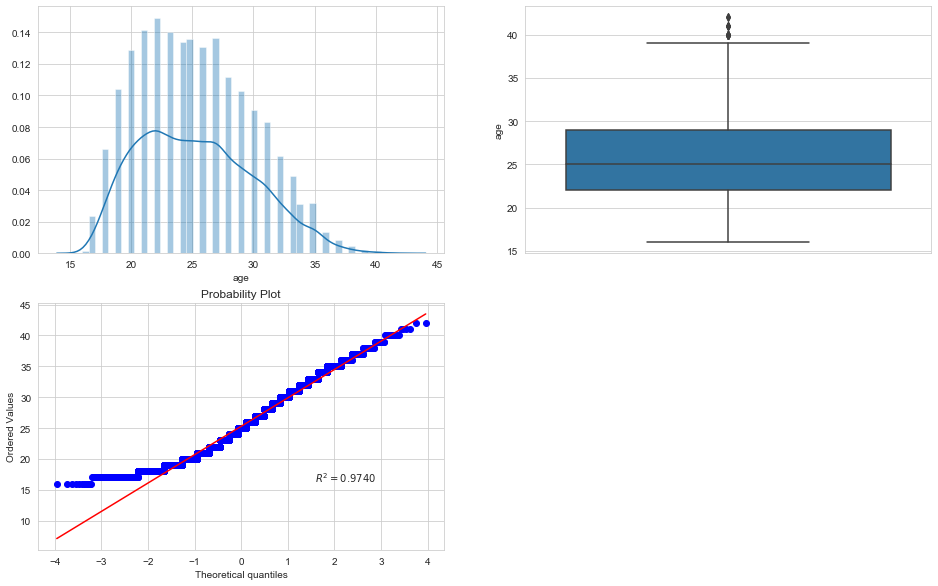

In [57]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.age)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.age)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.age,plot=plt,rvalue=True)



((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([156, 157, 158, ..., 203, 203, 205], dtype=int64)),
 (6.745559979672414, 181.36218404639456, 0.9981330302509561))

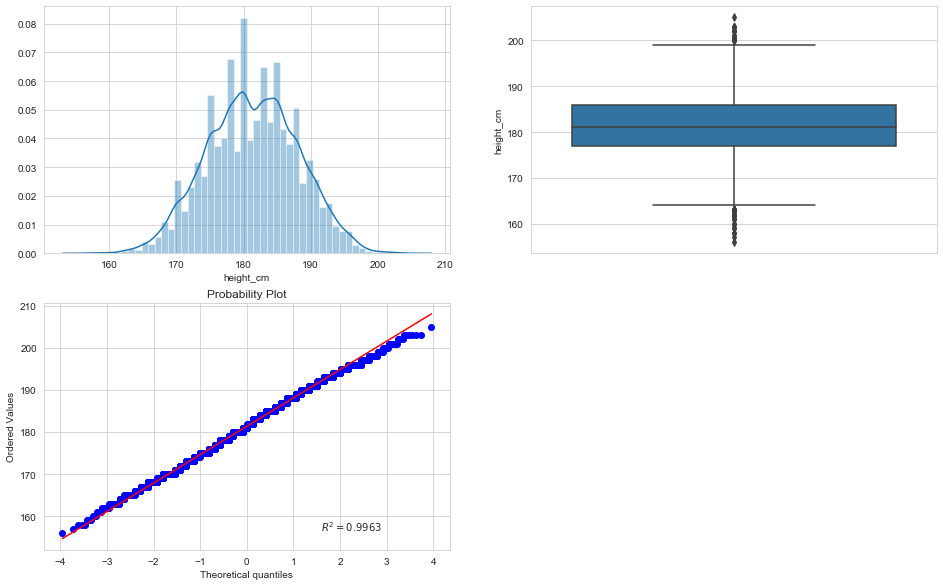

In [58]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.height_cm)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.height_cm)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.height_cm,plot=plt,rvalue=True)


((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([ 50,  52,  52, ..., 104, 107, 110], dtype=int64)),
 (7.031309767723657, 75.2763431447642, 0.997488717789581))

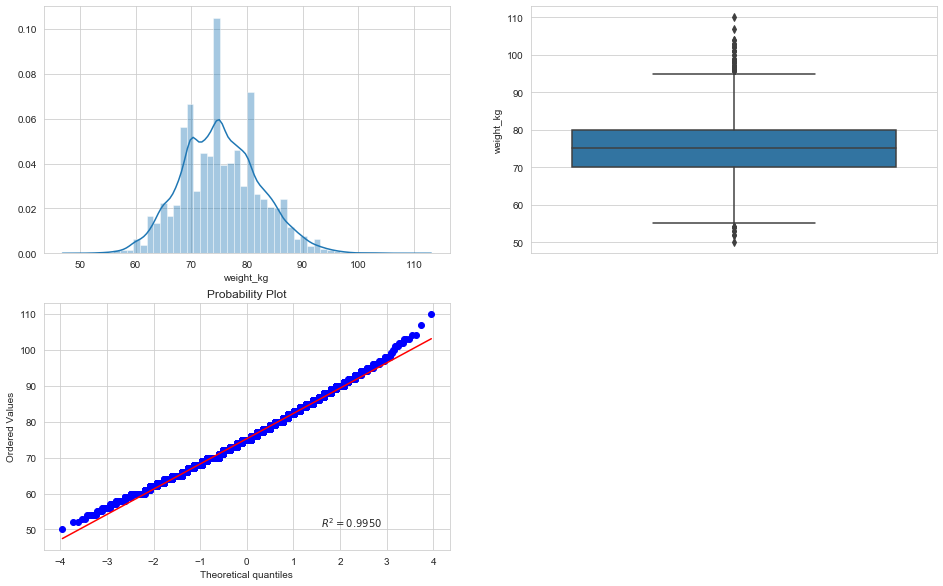

In [59]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.weight_kg)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.weight_kg)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.weight_kg,plot=plt,rvalue=True)


((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([48, 48, 48, ..., 92, 93, 94], dtype=int64)),
 (6.9390820436205845, 66.24499398183609, 0.9982561482439795))

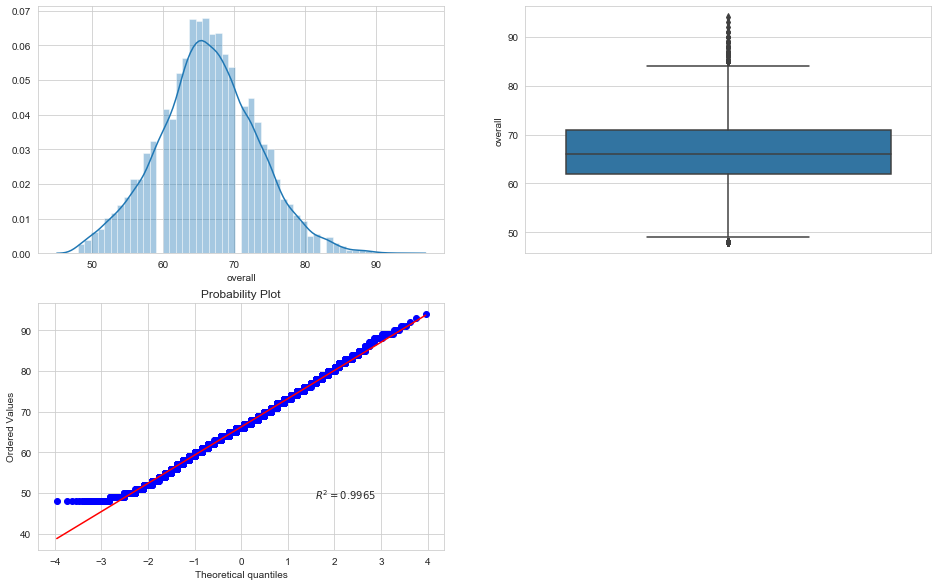

In [60]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.overall)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.overall)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.overall,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([49, 49, 50, ..., 93, 94, 95], dtype=int64)),
 (6.120194533645648, 71.5468869679396, 0.9966487307387757))

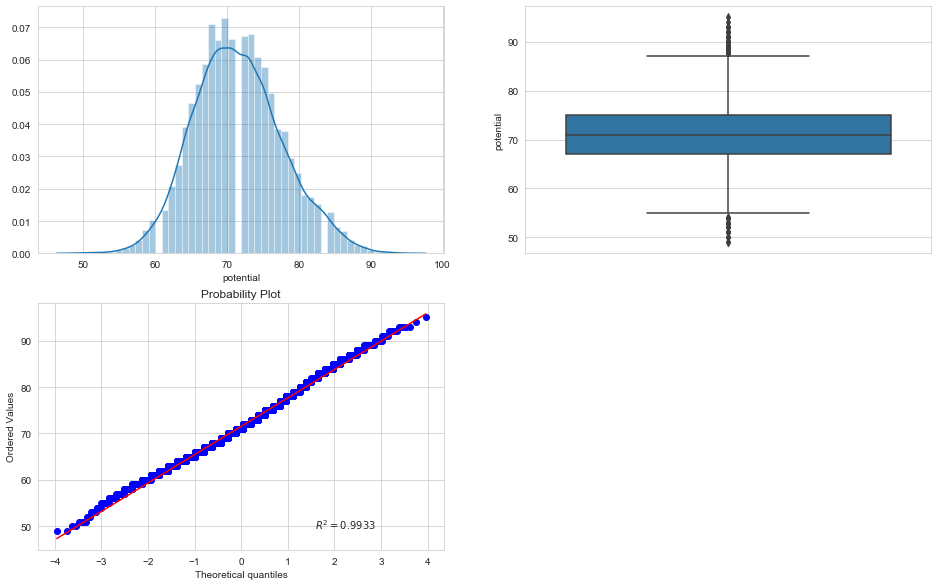

In [61]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.potential)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.potential)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.potential,plot=plt,rvalue=True)


((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([        0,         0,         0, ...,  93500000,  95500000,
         105500000], dtype=int64)),
 (3614436.4322534036, 2484037.640879748, 0.6469963973619357))

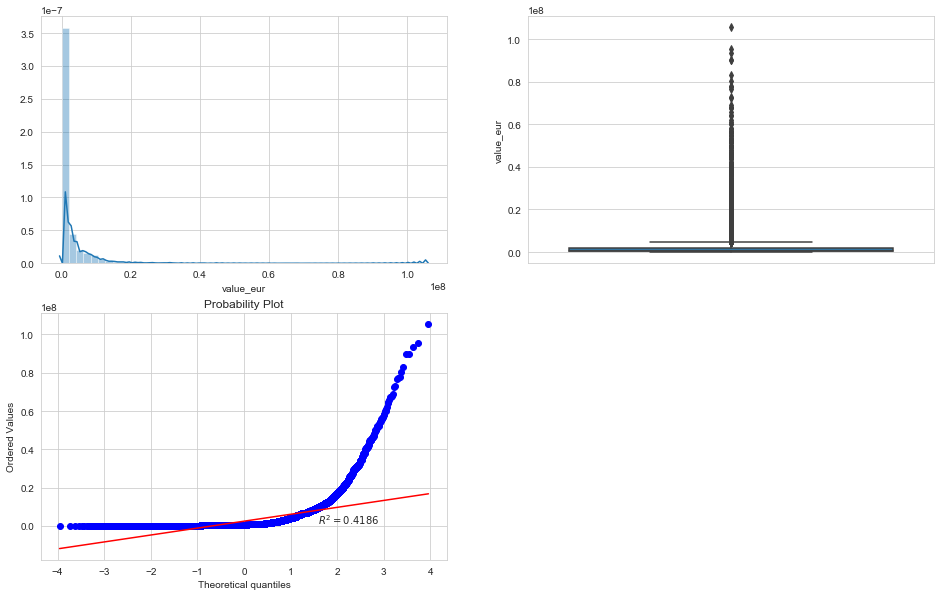

In [62]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.value_eur)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.value_eur)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.value_eur,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([     0,      0,      0, ..., 405000, 470000, 565000], dtype=int64)),
 (13325.388149835137, 9456.942772732255, 0.6239775688232889))

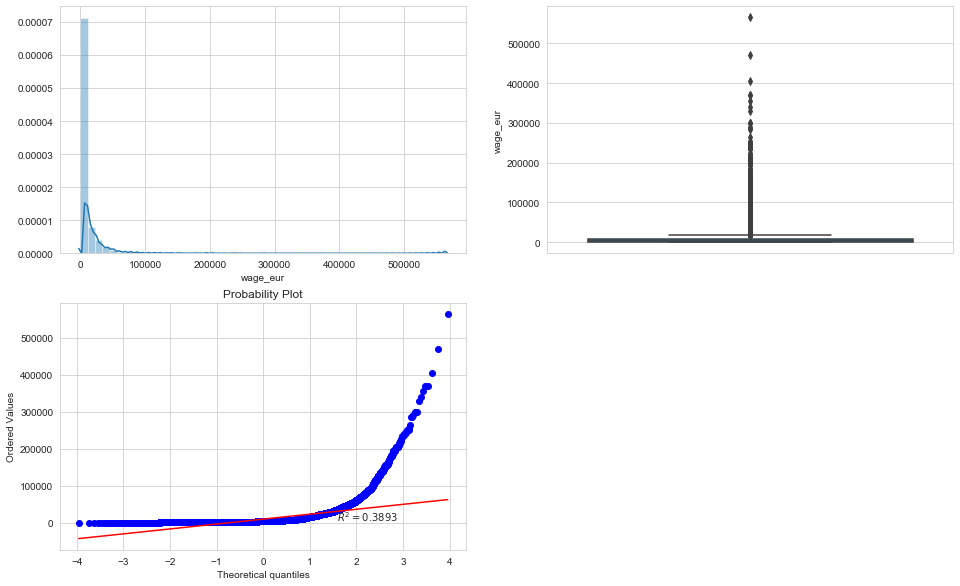

In [64]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.wage_eur)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.wage_eur)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.wage_eur,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([12., 13., 15., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


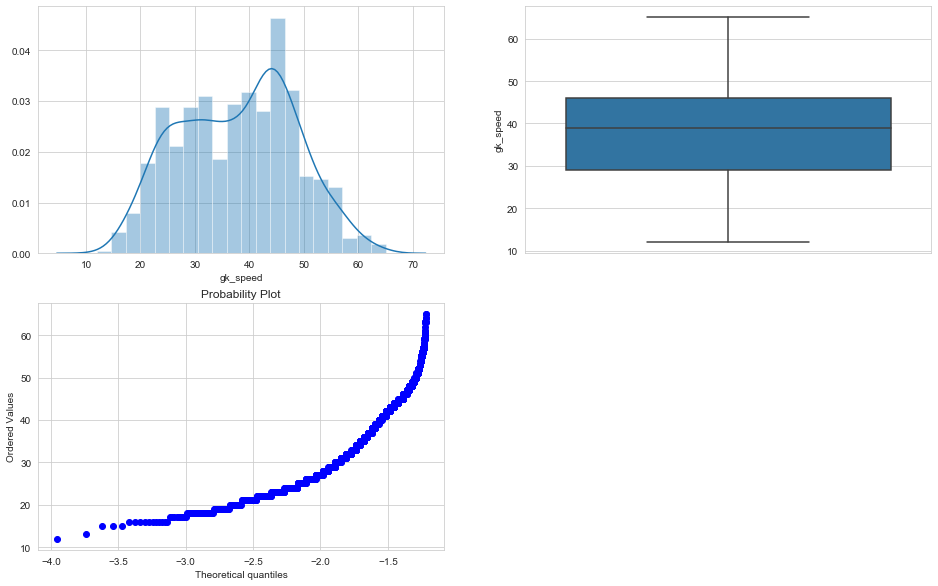

In [15]:

plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.gk_speed)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.gk_speed)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.gk_speed,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([24., 25., 25., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


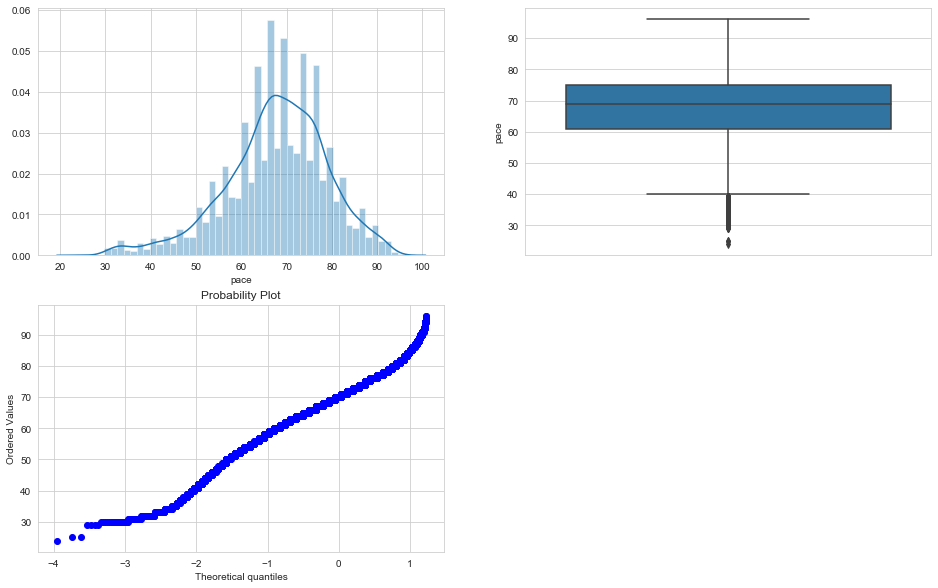

In [78]:

plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.pace)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.pace)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.pace,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([13000., 13000., 18000., ...,    nan,    nan,    nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


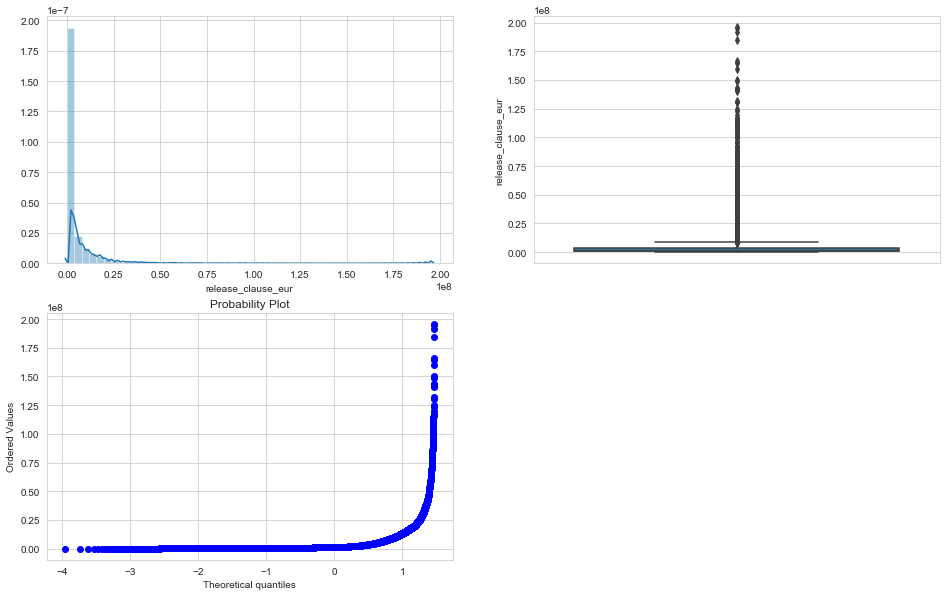

In [80]:

plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.release_clause_eur)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.release_clause_eur)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.release_clause_eur,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([ 1,  1,  1, ..., 90, 91, 92], dtype=int64)),
 (13.195833802776288, 16.70992449939819, 0.7314207719892416))

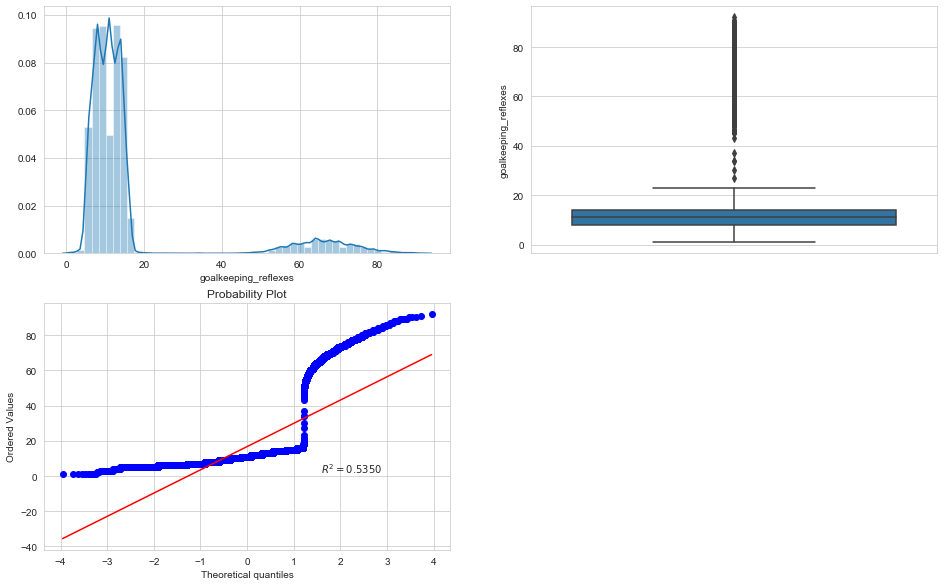

In [11]:

plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.goalkeeping_reflexes)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.goalkeeping_reflexes)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.goalkeeping_reflexes,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([27., 31., 31., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


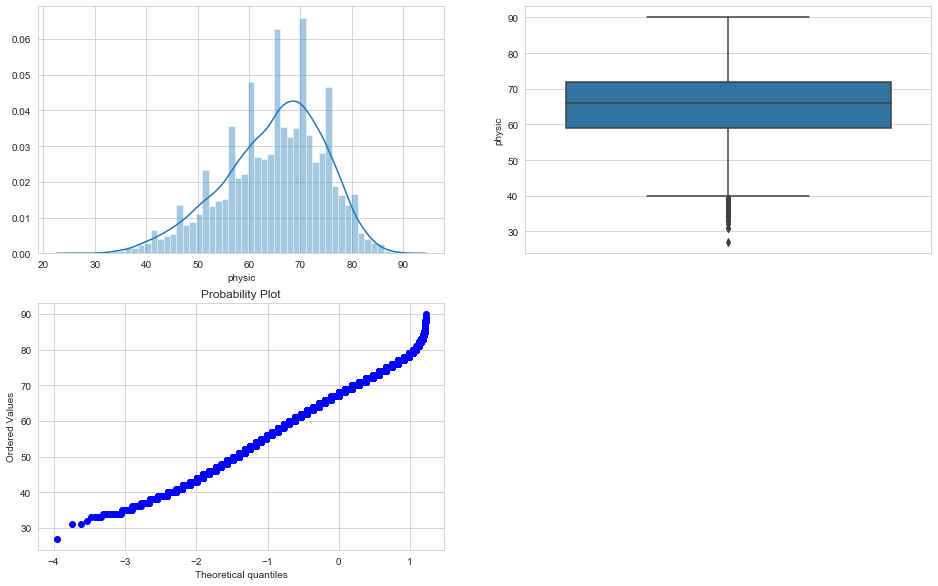

In [82]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.physic)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.physic)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.physic,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([24., 24., 24., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


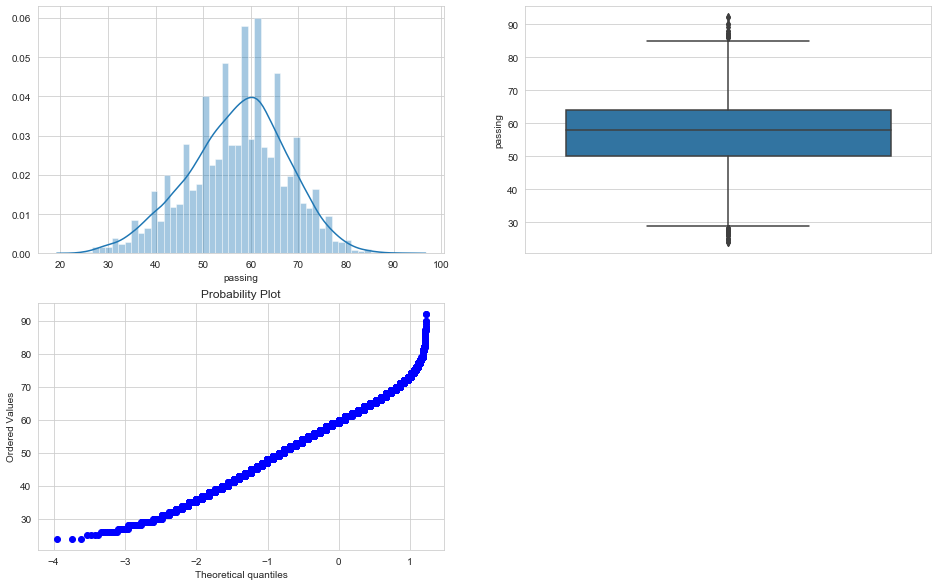

In [83]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.passing)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.passing)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.passing,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([15., 15., 16., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


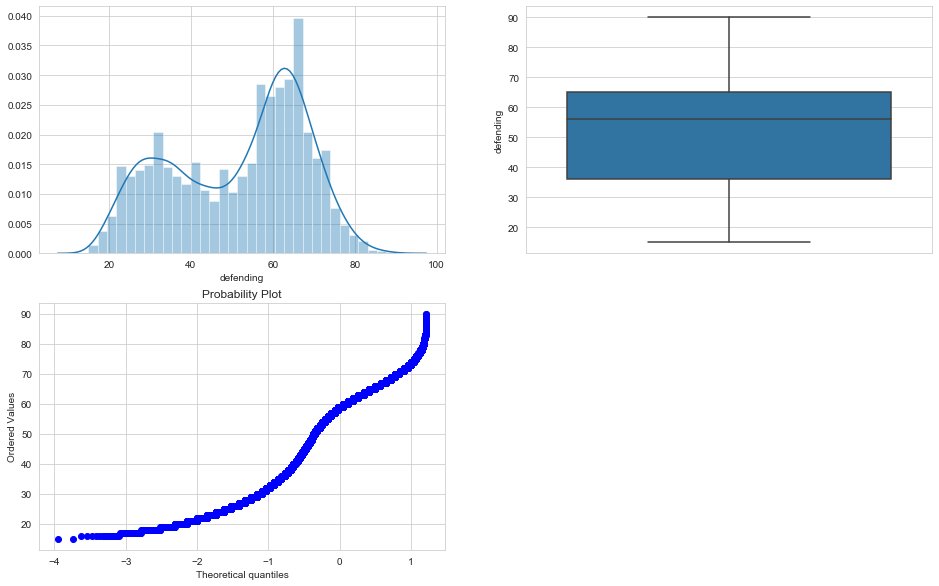

In [84]:

plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.defending)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.defending)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.defending,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([15., 16., 16., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


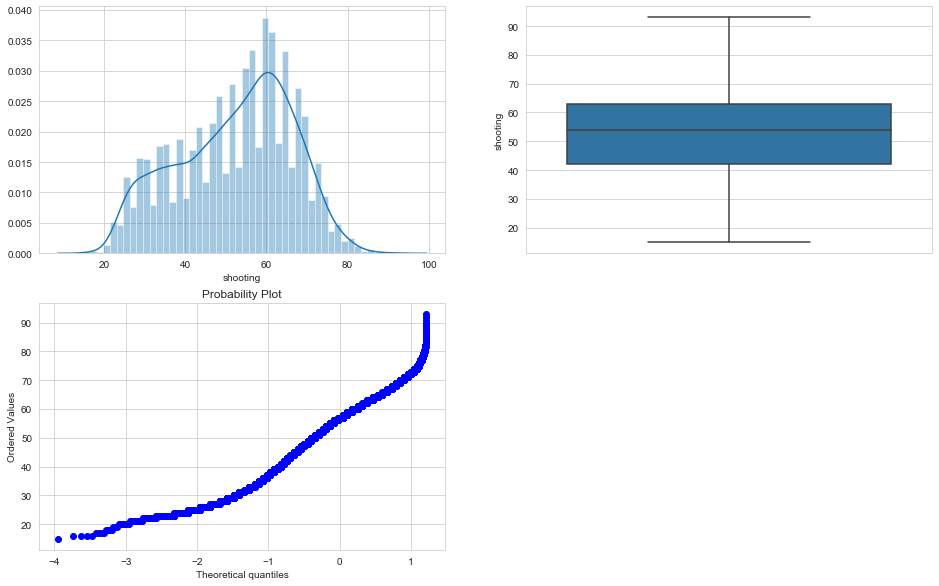

In [85]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.shooting)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.shooting)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.shooting,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([23., 26., 27., ..., nan, nan, nan])),
 (nan, nan, nan))

posx and posy should be finite values
posx and posy should be finite values


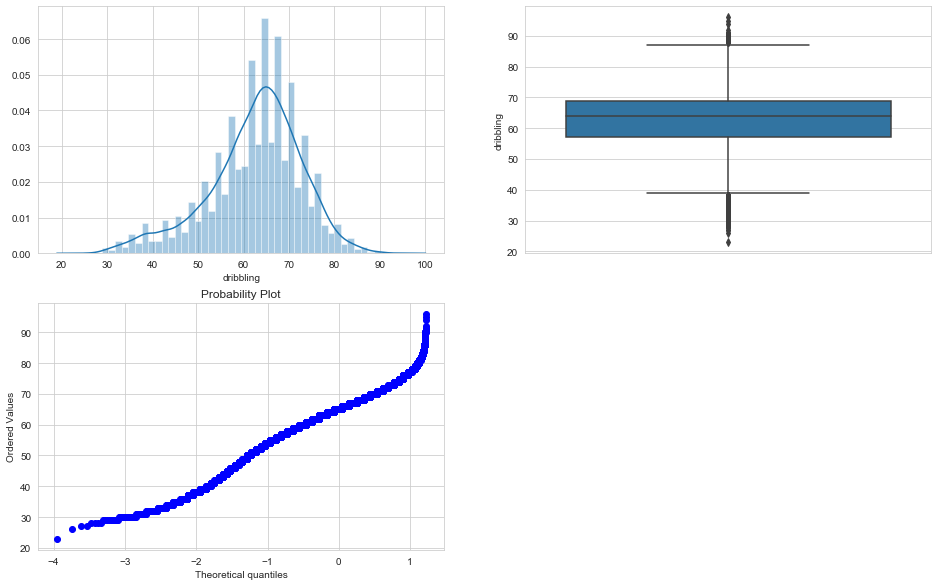

In [86]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.dribbling)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.dribbling)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.dribbling,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([ 1,  1,  1, ..., 87, 89, 92], dtype=int64)),
 (12.53631843842256, 16.354852828537044, 0.7374311986449213))

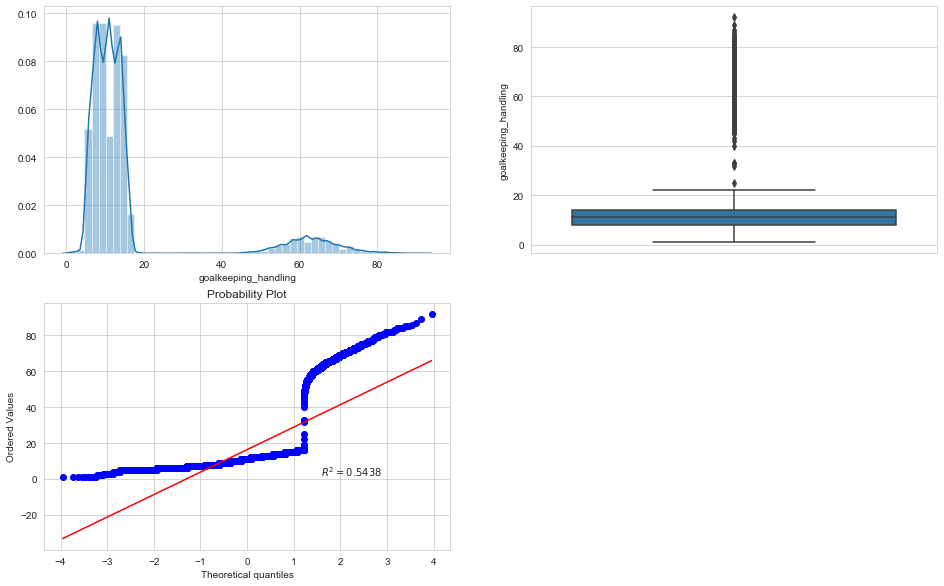

In [14]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.goalkeeping_handling)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.goalkeeping_handling)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.goalkeeping_handling,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([ 1,  1,  1, ..., 90, 91, 93], dtype=int64)),
 (12.314520140508506, 16.21293358135464, 0.741095037835917))

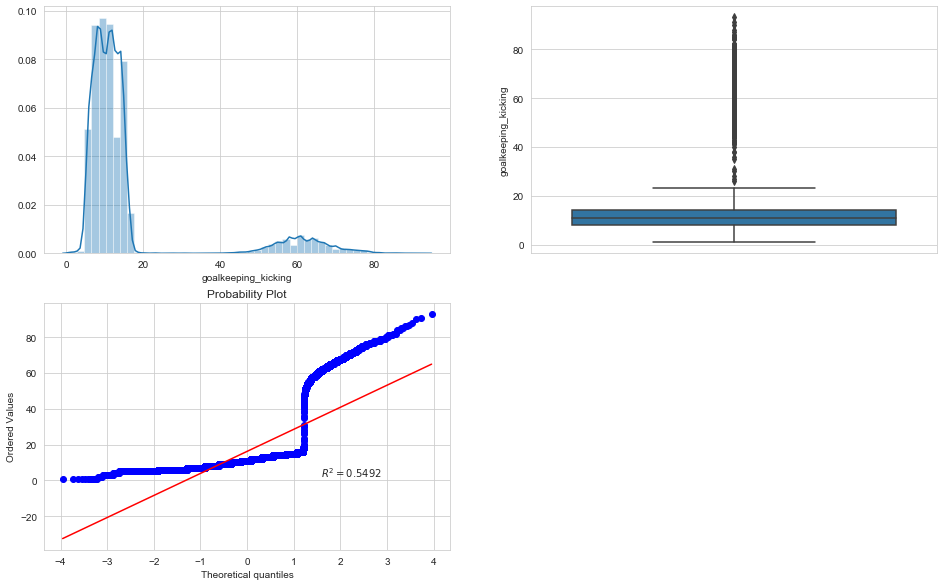

In [13]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.goalkeeping_kicking)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.goalkeeping_kicking)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.goalkeeping_kicking,plot=plt,rvalue=True)

((array([-3.95716819, -3.73989461, -3.62095603, ...,  3.62095603,
          3.73989461,  3.95716819]),
  array([ 1,  1,  1, ..., 90, 90, 91], dtype=int64)),
 (12.627265657768787, 16.3680380785644, 0.7367313038844311))

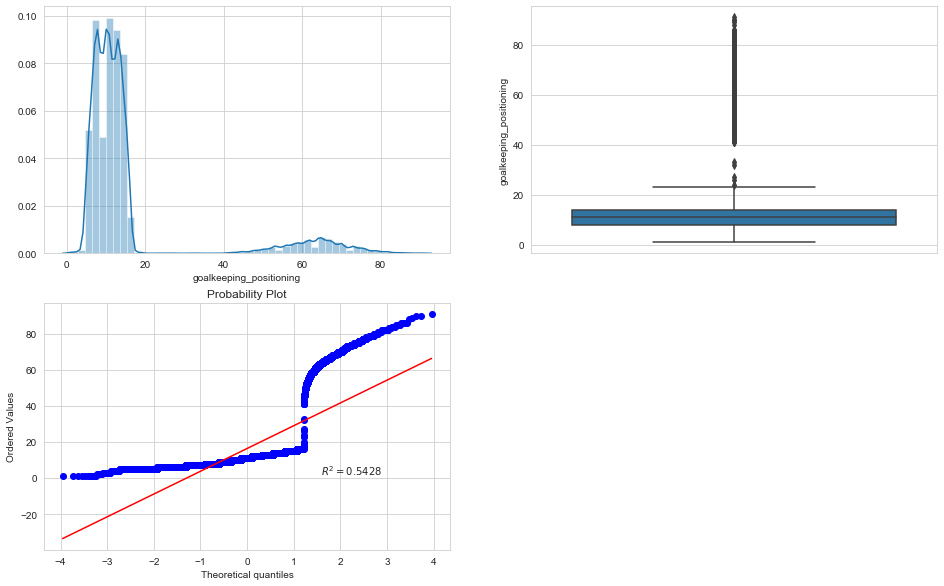

In [12]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,2,1)
sns.set_style(style="whitegrid")
sns.distplot(df.goalkeeping_positioning)
ax=plt.subplot(2,2,2)
sns.set_style(style="whitegrid")
sns.boxplot(y=df.goalkeeping_positioning)
ax=plt.subplot(2,2,3)
sns.set_style(style="whitegrid")
stats.probplot(df.goalkeeping_positioning,plot=plt,rvalue=True)

In [93]:
df['nationality'].describe()

count       18278
unique        162
top       England
freq         1667
Name: nationality, dtype: object

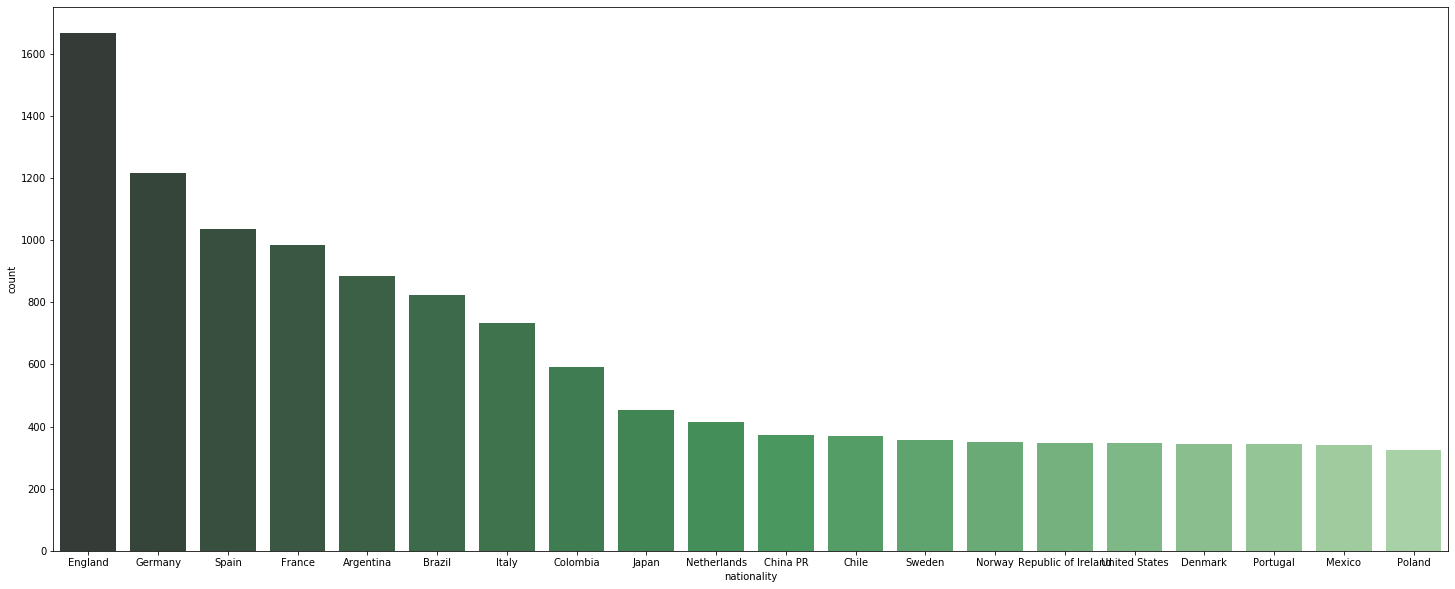

In [20]:
plt.figure(figsize=(25,10))
sns.countplot(df.nationality , palette="Greens_d",
              order=df.nationality.value_counts().iloc[:20].index)

<AxesSubplot:xlabel='club', ylabel='count'>

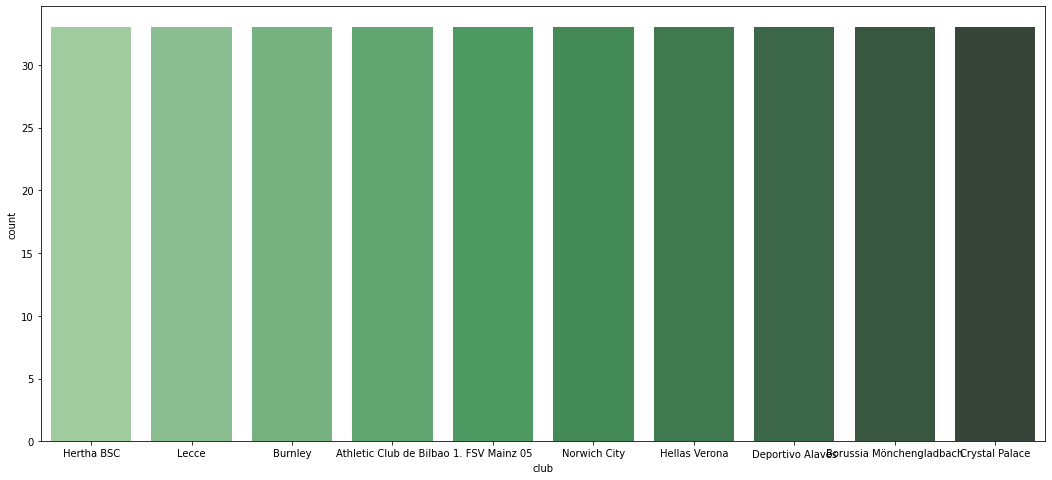

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(df.club , palette="Greens_d",
              order=df.club.value_counts().iloc[:10].index)

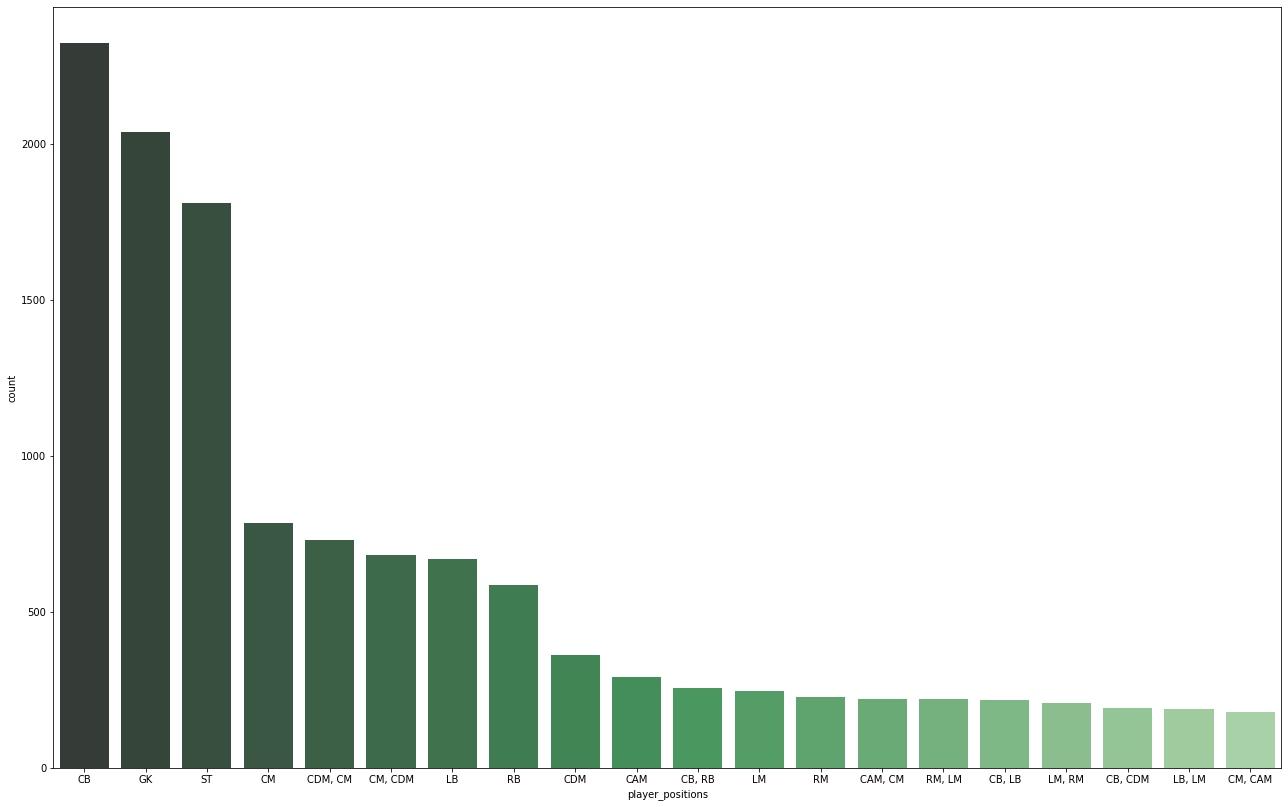

In [29]:
plt.figure(figsize=(22,14))
sns.countplot(df.player_positions , palette="Greens_d",
              order=df.player_positions.value_counts().iloc[:20].index)

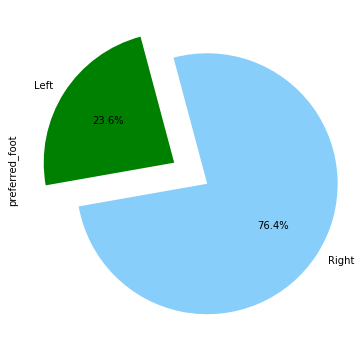

In [19]:
plt.figure(figsize=(8,6))
colors = ['lightskyblue', 'green',]
explode =(0.2,0.1) 
df['preferred_foot'].value_counts().plot(kind='pie', explode = explode, colors=colors, startangle=190, autopct='%.1f%%')



<AxesSubplot:xlabel='international_reputation', ylabel='count'>

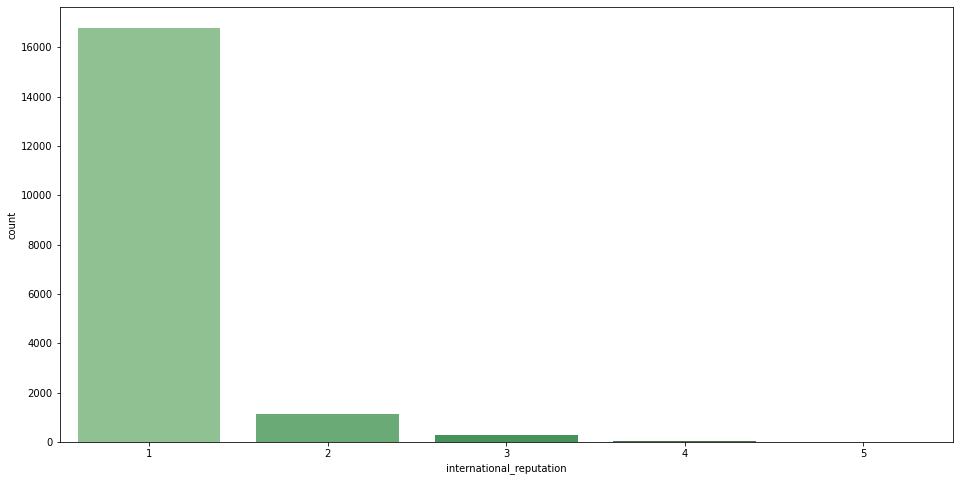

In [15]:
plt.figure(figsize=(16,8))
sns.countplot(df.international_reputation , palette="Greens_d",
             )

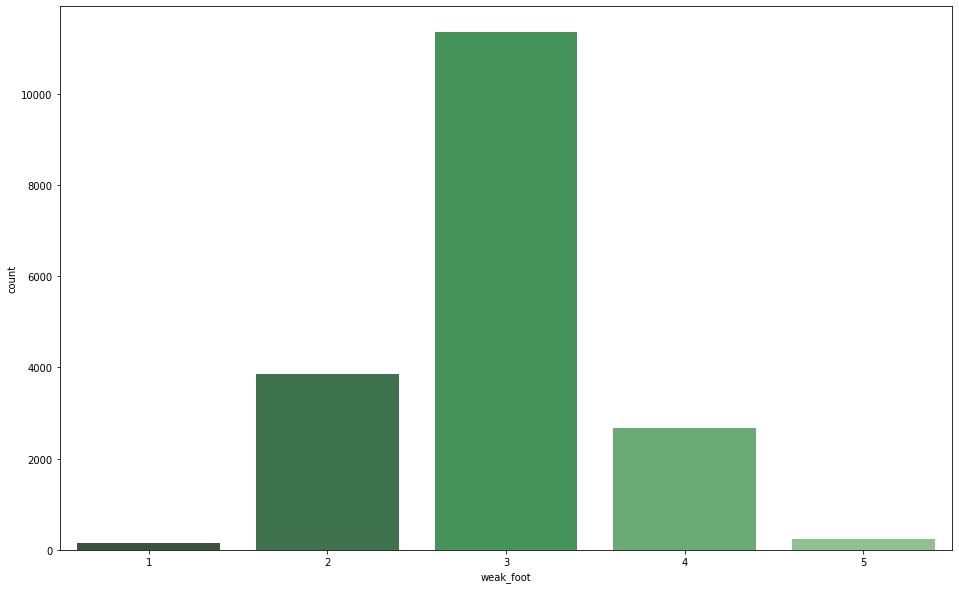

In [17]:
plt.figure(figsize=(16,10))
sns.countplot(df.weak_foot , palette="Greens_d",
              )

<AxesSubplot:ylabel='skill_moves'>

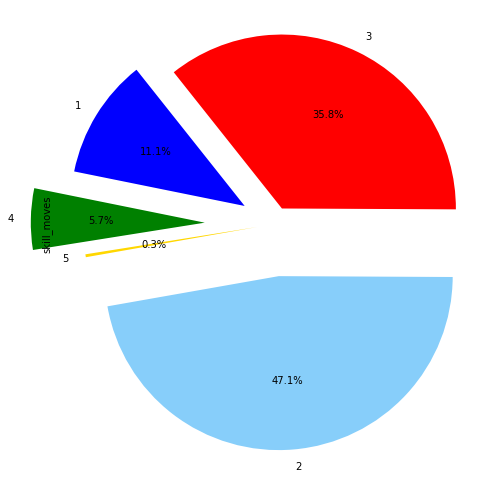

In [18]:
plt.figure(figsize=(10,8))
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
explode =(0.3,0.1,0.2,0.4,0.1) 
df['skill_moves'].value_counts().plot(kind='pie', explode = explode, colors=colors, startangle=190, autopct='%.1f%%')



<AxesSubplot:xlabel='work_rate', ylabel='count'>

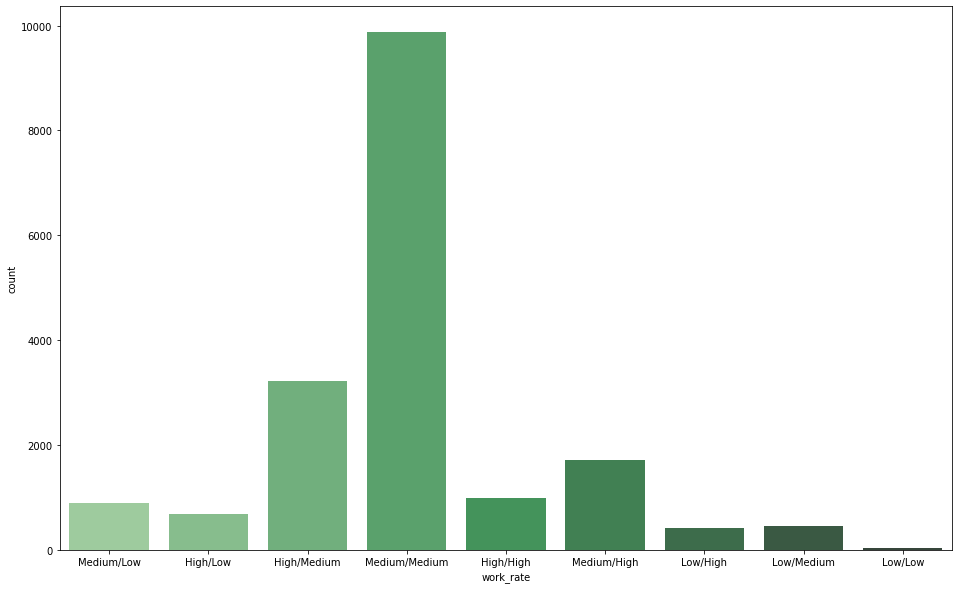

In [19]:
plt.figure(figsize=(16,10))
sns.countplot(df.work_rate, palette="Greens_d",)


<AxesSubplot:xlabel='body_type', ylabel='count'>

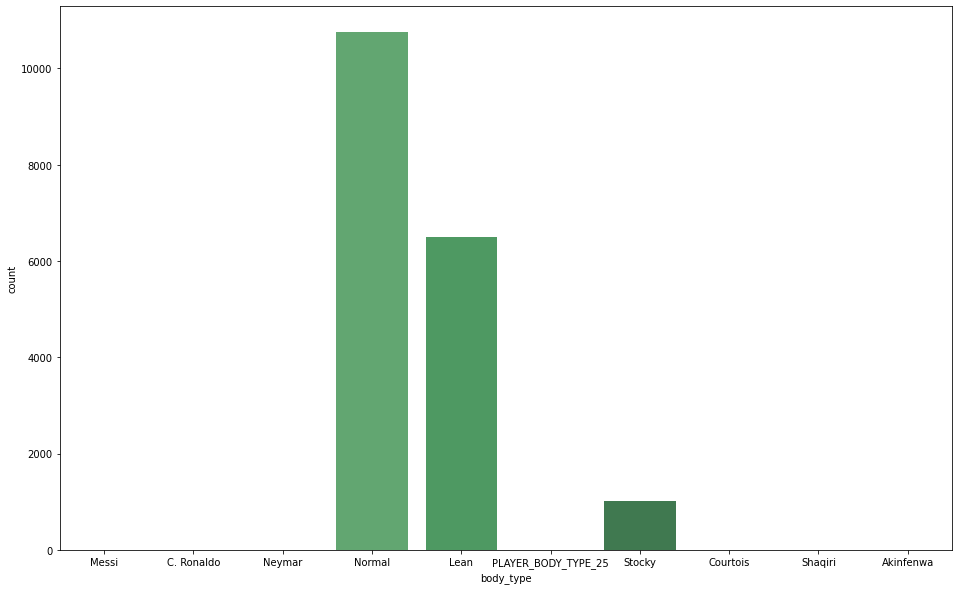

In [28]:
plt.figure(figsize=(16,10))
sns.countplot(df.body_type, palette="Greens_d",)


In [3]:
data = df.iloc[:,31:77]

In [4]:

data.head()

pace  shooting  passing  dribbling  defending  physic  gk_diving  \
0  87.0      92.0     92.0       96.0       39.0    66.0        NaN   
1  90.0      93.0     82.0       89.0       35.0    78.0        NaN   
2  91.0      85.0     87.0       95.0       32.0    58.0        NaN   
3   NaN       NaN      NaN        NaN        NaN     NaN       87.0   
4  91.0      83.0     86.0       94.0       35.0    66.0        NaN   

   gk_handling  gk_kicking  gk_reflexes  ...  mentality_vision  \
0          NaN         NaN          NaN  ...                94   
1          NaN         NaN          NaN  ...                82   
2          NaN         NaN          NaN  ...                90   
3         92.0        78.0         89.0  ...                65   
4          NaN         NaN          NaN  ...                89   

   mentality_penalties mentality_composure  defending_marking  \
0                   75                  96                 33   
1                   85                  95                 28   
2                   90                  94                 27   
3                   11                  68                 27   
4                   88                  91                 34   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                         37                        26                   6   
1                         32                        24                   7   
2                         26                        29                   9   
3                         12                        18                  87   
4                         27                        22                  11   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  
0                    11                   15                       14  
1                    11                   15                       14  
2                     9                   15                       15  
3                    92                   78                       90  
4                    12                    6                        8  

[5 rows x 46 columns]

In [6]:
data.drop(['gk_diving','gk_speed','gk_handling','gk_kicking','gk_reflexes','gk_positioning'],axis=1, inplace=True)

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html('sweet_report.html')

In [7]:
from pandas_profiling import ProfileReport

In [8]:
design_report = ProfileReport(data)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/53 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

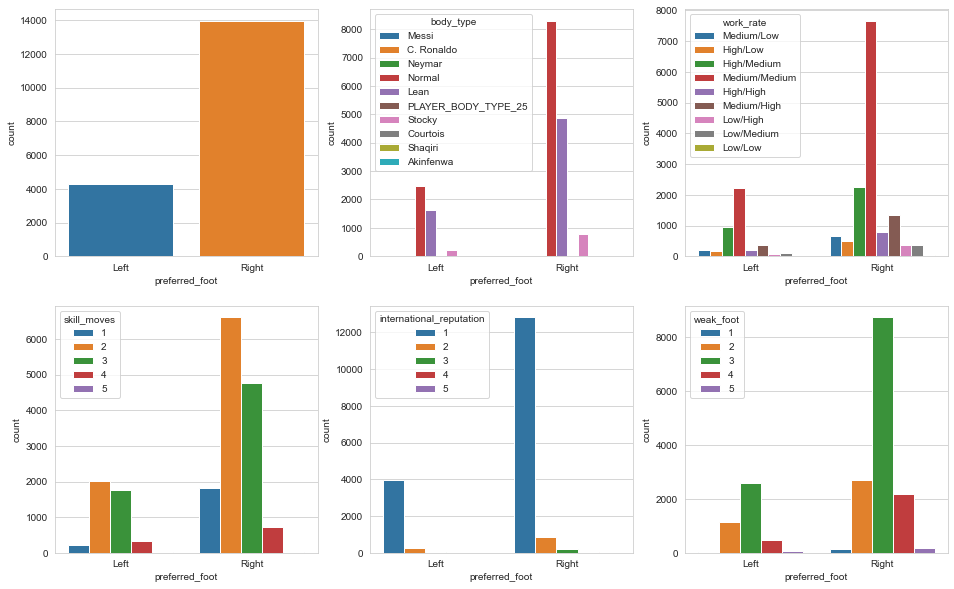

In [34]:
plt.figure(figsize=(16,10))

ax=plt.subplot(2,3,1)
sns.set_style(style="whitegrid")
sns.countplot(df.preferred_foot)
ax=plt.subplot(2,3,2)
sns.set_style(style="whitegrid")
sns.countplot(df.preferred_foot,hue=df.body_type)
ax=plt.subplot(2,3,3)
sns.set_style(style="whitegrid")
sns.countplot(df.preferred_foot,hue=df.work_rate)
ax=plt.subplot(2,3,4)
sns.set_style(style="whitegrid")
sns.countplot(df.preferred_foot,hue=df.skill_moves)
ax=plt.subplot(2,3,5)
sns.set_style(style="whitegrid")
sns.countplot(df.preferred_foot,hue=df.international_reputation)
ax=plt.subplot(2,3,6)
sns.set_style(style="whitegrid")
sns.countplot(df.preferred_foot,hue=df.weak_foot)



<AxesSubplot:xlabel='body_type', ylabel='count'>

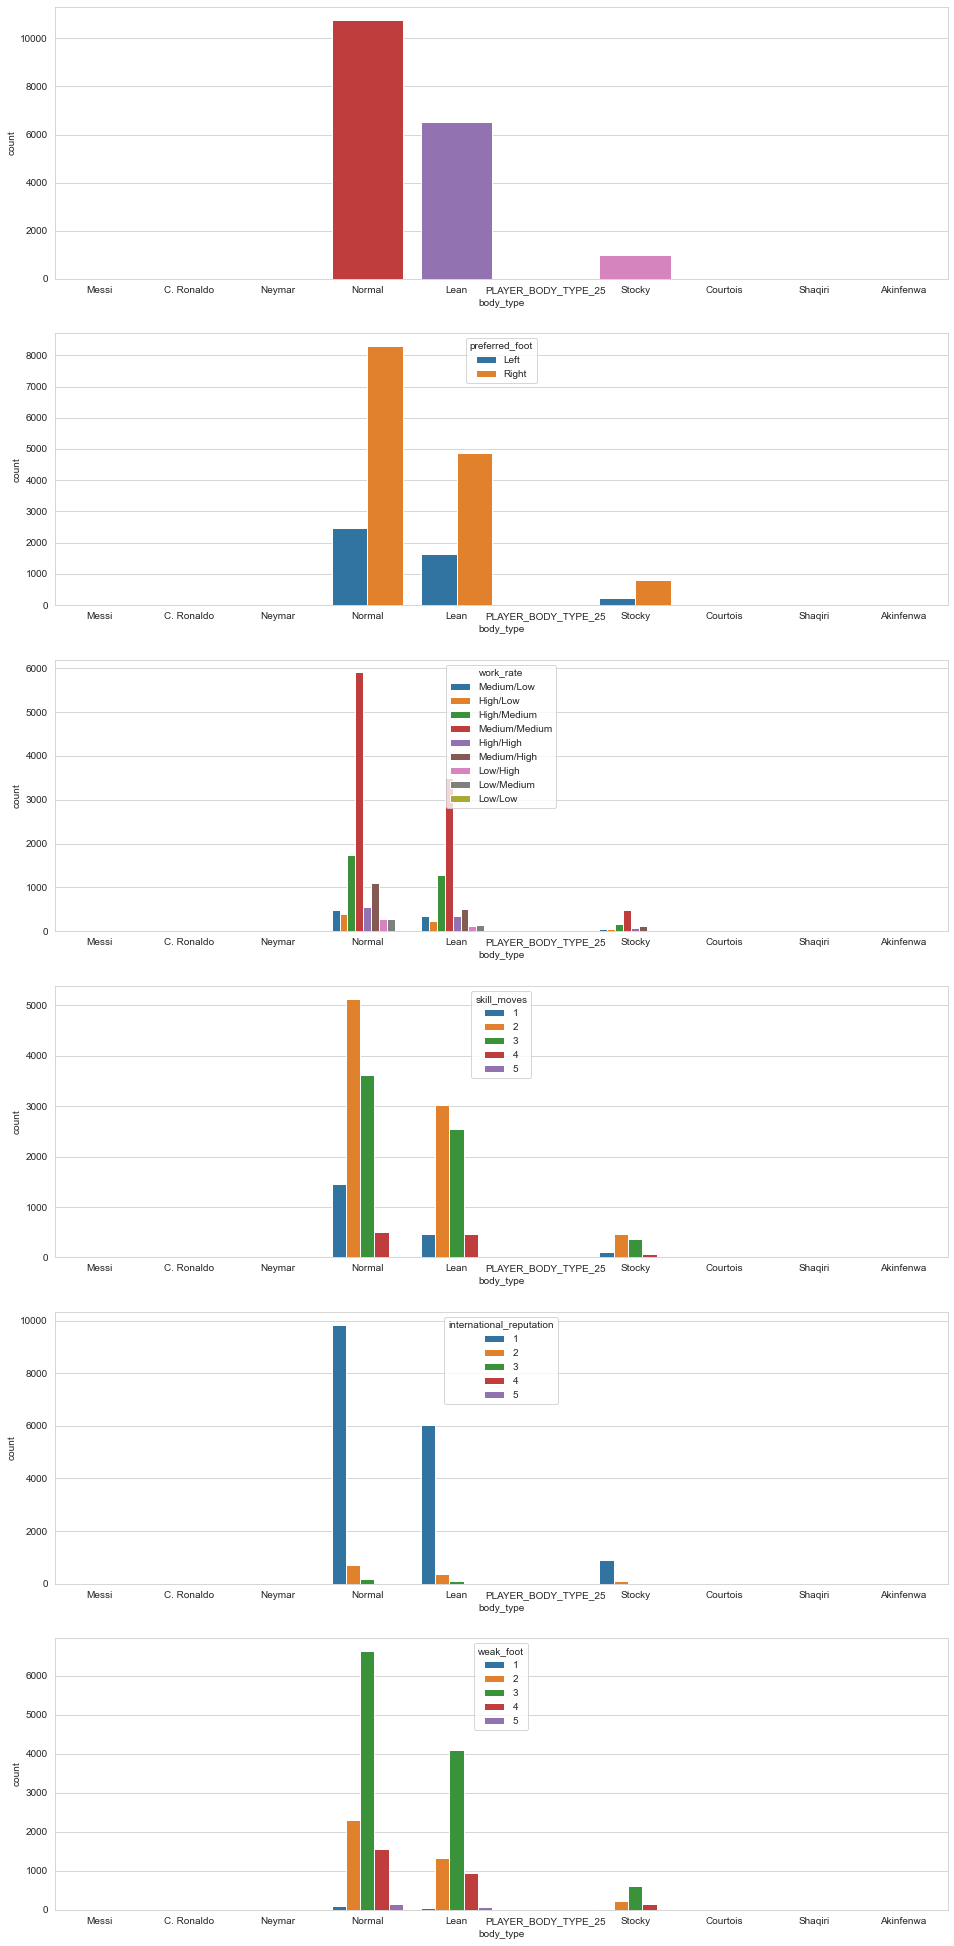

In [43]:
plt.figure(figsize=(16,35))
ax=plt.subplot(6,1,1)
sns.set_style(style="whitegrid")
sns.countplot(df.body_type)
ax=plt.subplot(6,1,2)
sns.set_style(style="whitegrid")
sns.countplot(df.body_type,hue=df.preferred_foot)
ax=plt.subplot(6,1,3)
sns.set_style(style="whitegrid")
sns.countplot(df.body_type,hue=df.work_rate)
ax=plt.subplot(6,1,4)
sns.set_style(style="whitegrid")
sns.countplot(df.body_type,hue=df.skill_moves)
ax=plt.subplot(6,1,5)
sns.set_style(style="whitegrid")
sns.countplot(df.body_type,hue=df.international_reputation)
ax=plt.subplot(6,1,6)
sns.set_style(style="whitegrid")
sns.countplot(df.body_type,hue=df.weak_foot)



<AxesSubplot:xlabel='work_rate', ylabel='count'>

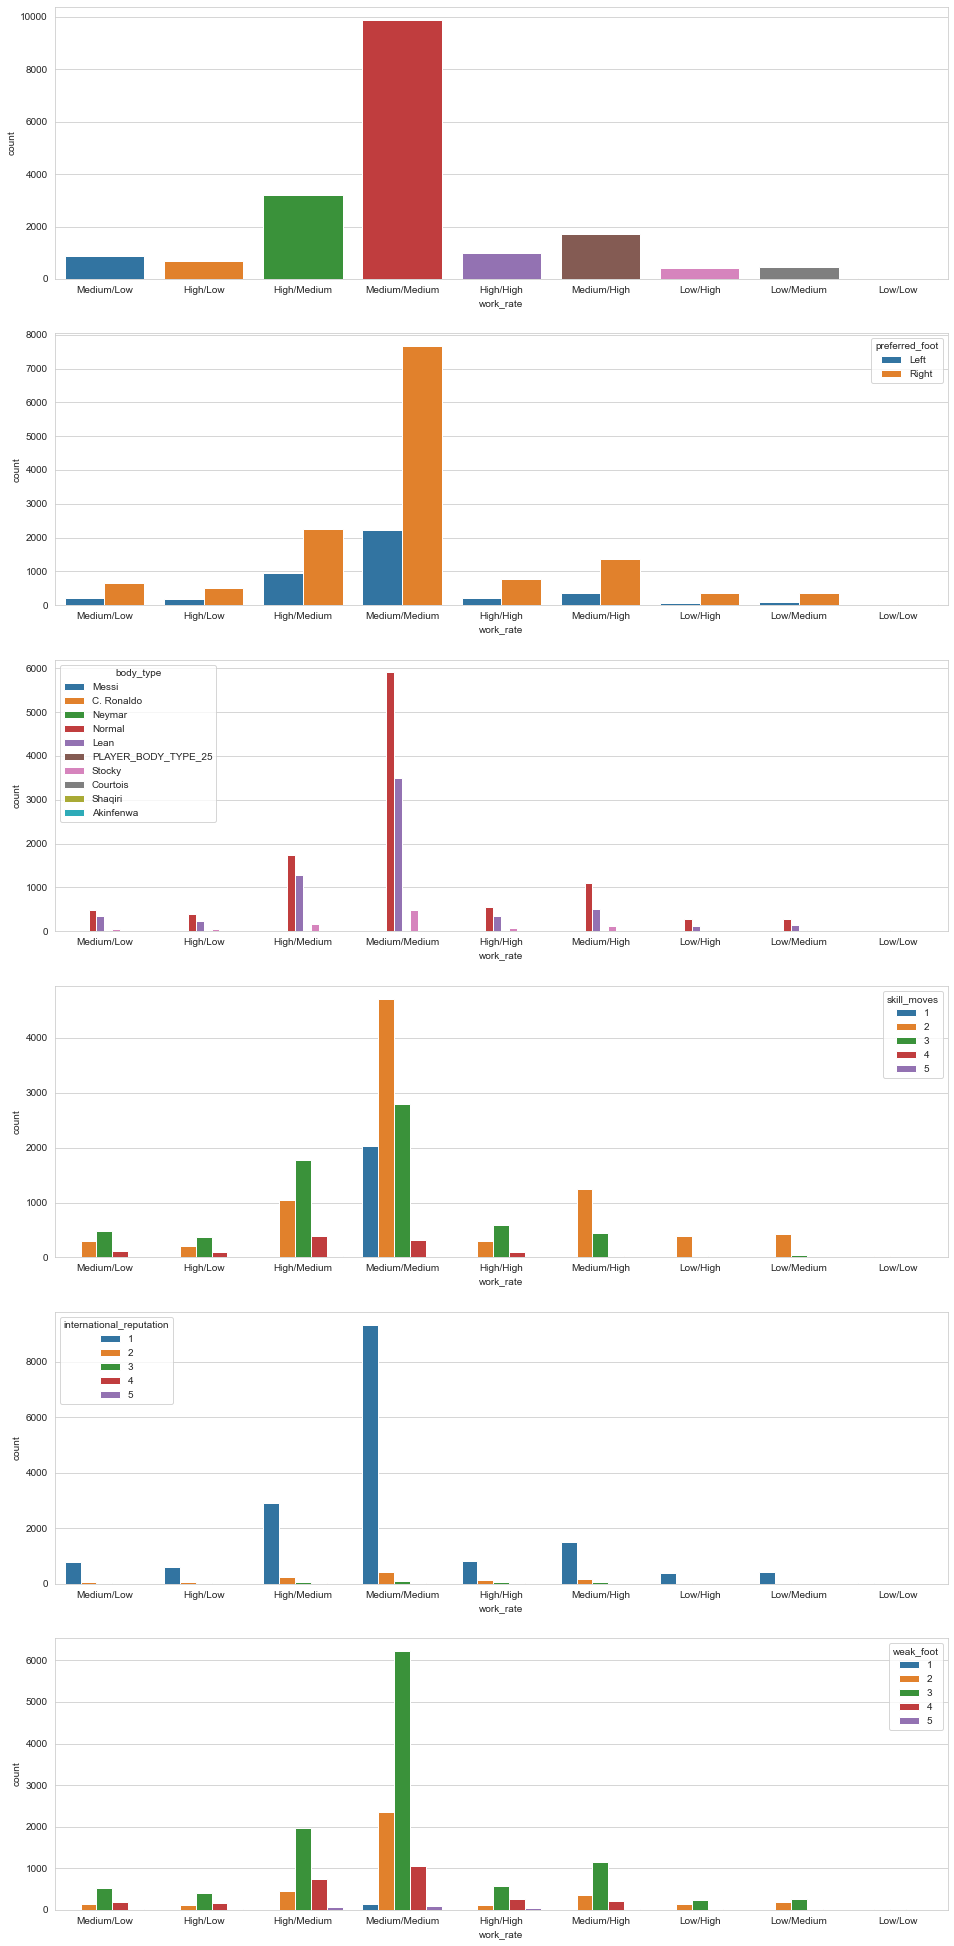

In [44]:
plt.figure(figsize=(16,35))
ax=plt.subplot(6,1,1)
sns.set_style(style="whitegrid")
sns.countplot(df.work_rate)
ax=plt.subplot(6,1,2)
sns.set_style(style="whitegrid")
sns.countplot(df.work_rate,hue=df.preferred_foot)
ax=plt.subplot(6,1,3)
sns.set_style(style="whitegrid")
sns.countplot(df.work_rate,hue=df.body_type)
ax=plt.subplot(6,1,4)
sns.set_style(style="whitegrid")
sns.countplot(df.work_rate,hue=df.skill_moves)
ax=plt.subplot(6,1,5)
sns.set_style(style="whitegrid")
sns.countplot(df.work_rate,hue=df.international_reputation)
ax=plt.subplot(6,1,6)
sns.set_style(style="whitegrid")
sns.countplot(df.work_rate,hue=df.weak_foot)



<AxesSubplot:xlabel='skill_moves', ylabel='count'>

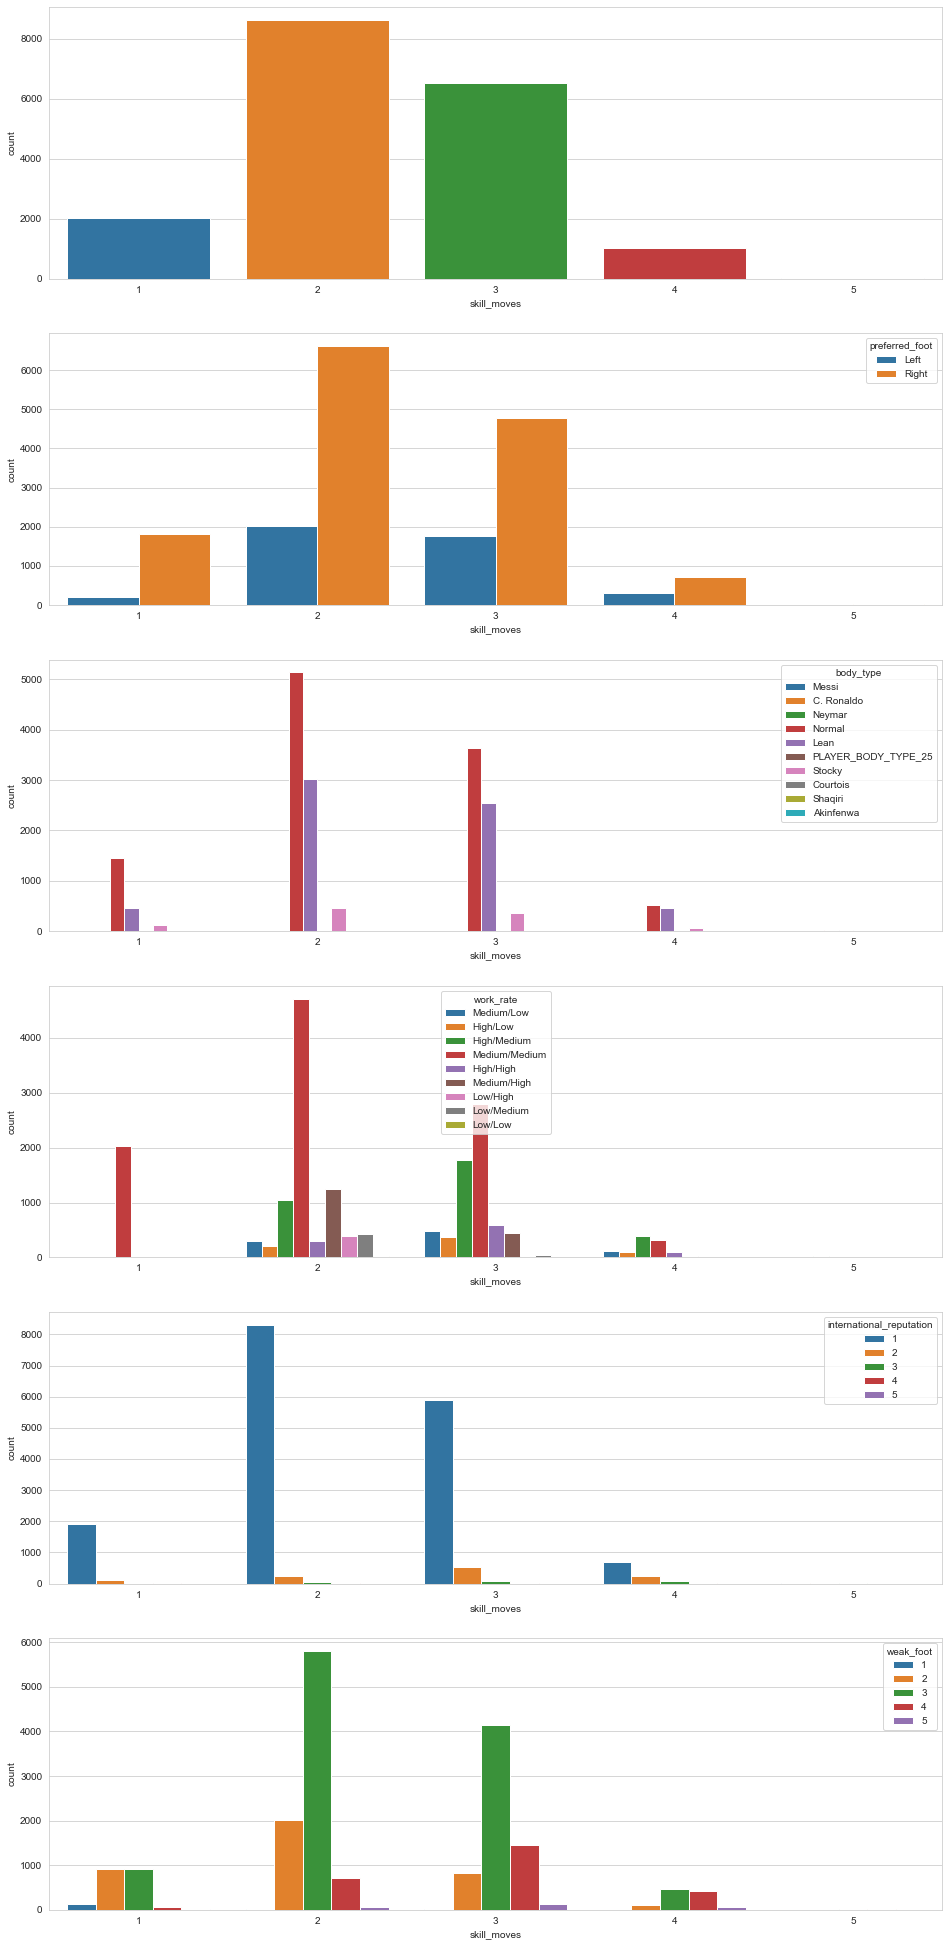

In [45]:
plt.figure(figsize=(16,35))
ax=plt.subplot(6,1,1)
sns.set_style(style="whitegrid")
sns.countplot(df.skill_moves)
ax=plt.subplot(6,1,2)
sns.set_style(style="whitegrid")
sns.countplot(df.skill_moves,hue=df.preferred_foot)
ax=plt.subplot(6,1,3)
sns.set_style(style="whitegrid")
sns.countplot(df.skill_moves,hue=df.body_type)
ax=plt.subplot(6,1,4)
sns.set_style(style="whitegrid")
sns.countplot(df.skill_moves,hue=df.work_rate)
ax=plt.subplot(6,1,5)
sns.set_style(style="whitegrid")
sns.countplot(df.skill_moves,hue=df.international_reputation)
ax=plt.subplot(6,1,6)
sns.set_style(style="whitegrid")
sns.countplot(df.skill_moves,hue=df.weak_foot)

<AxesSubplot:xlabel='international_reputation', ylabel='count'>

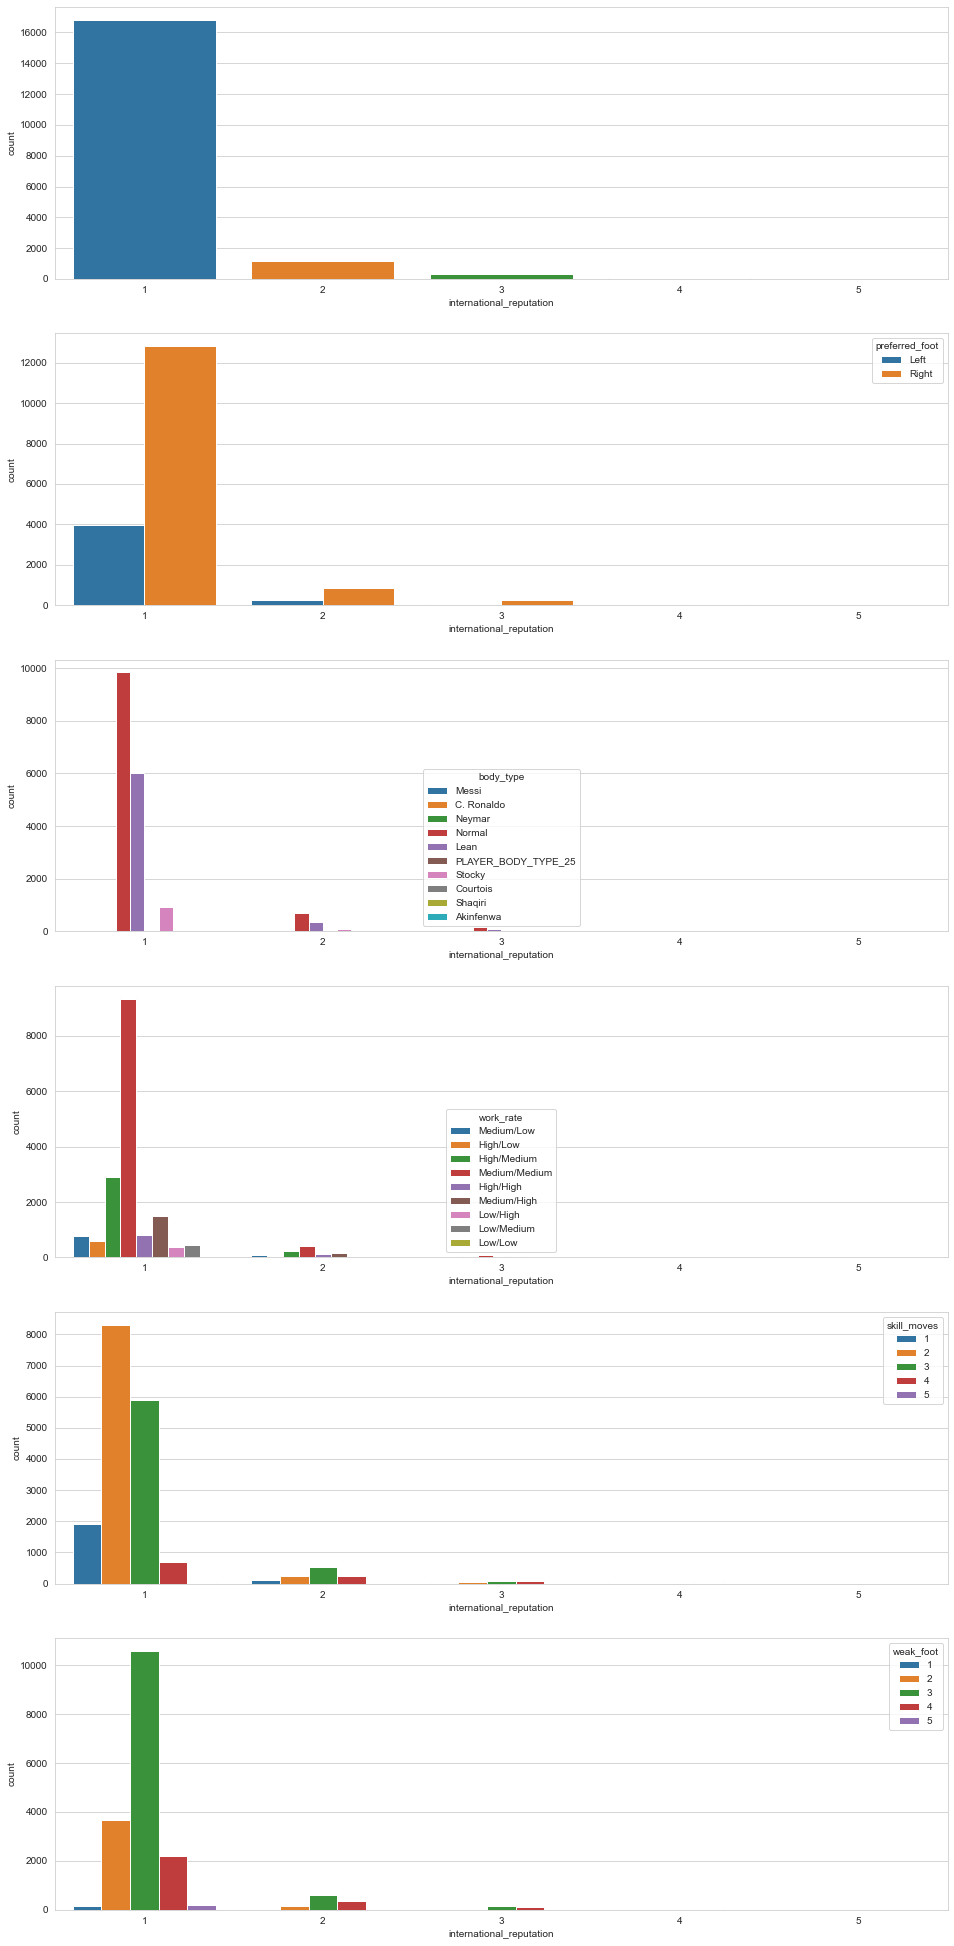

In [47]:
plt.figure(figsize=(16,35))
ax=plt.subplot(6,1,1)
sns.set_style(style="whitegrid")
sns.countplot(df.international_reputation)
ax=plt.subplot(6,1,2)
sns.set_style(style="whitegrid")
sns.countplot(df.international_reputation,hue=df.preferred_foot)
ax=plt.subplot(6,1,3)
sns.set_style(style="whitegrid")
sns.countplot(df.international_reputation,hue=df.body_type)
ax=plt.subplot(6,1,4)
sns.set_style(style="whitegrid")
sns.countplot(df.international_reputation,hue=df.work_rate)
ax=plt.subplot(6,1,5)
sns.set_style(style="whitegrid")
sns.countplot(df.international_reputation,hue=df.skill_moves)
ax=plt.subplot(6,1,6)
sns.set_style(style="whitegrid")
sns.countplot(df.international_reputation,hue=df.weak_foot)

In [ ]:
pace
shooting
passing
dribbling
defending
physic

<AxesSubplot:xlabel='weak_foot', ylabel='count'>

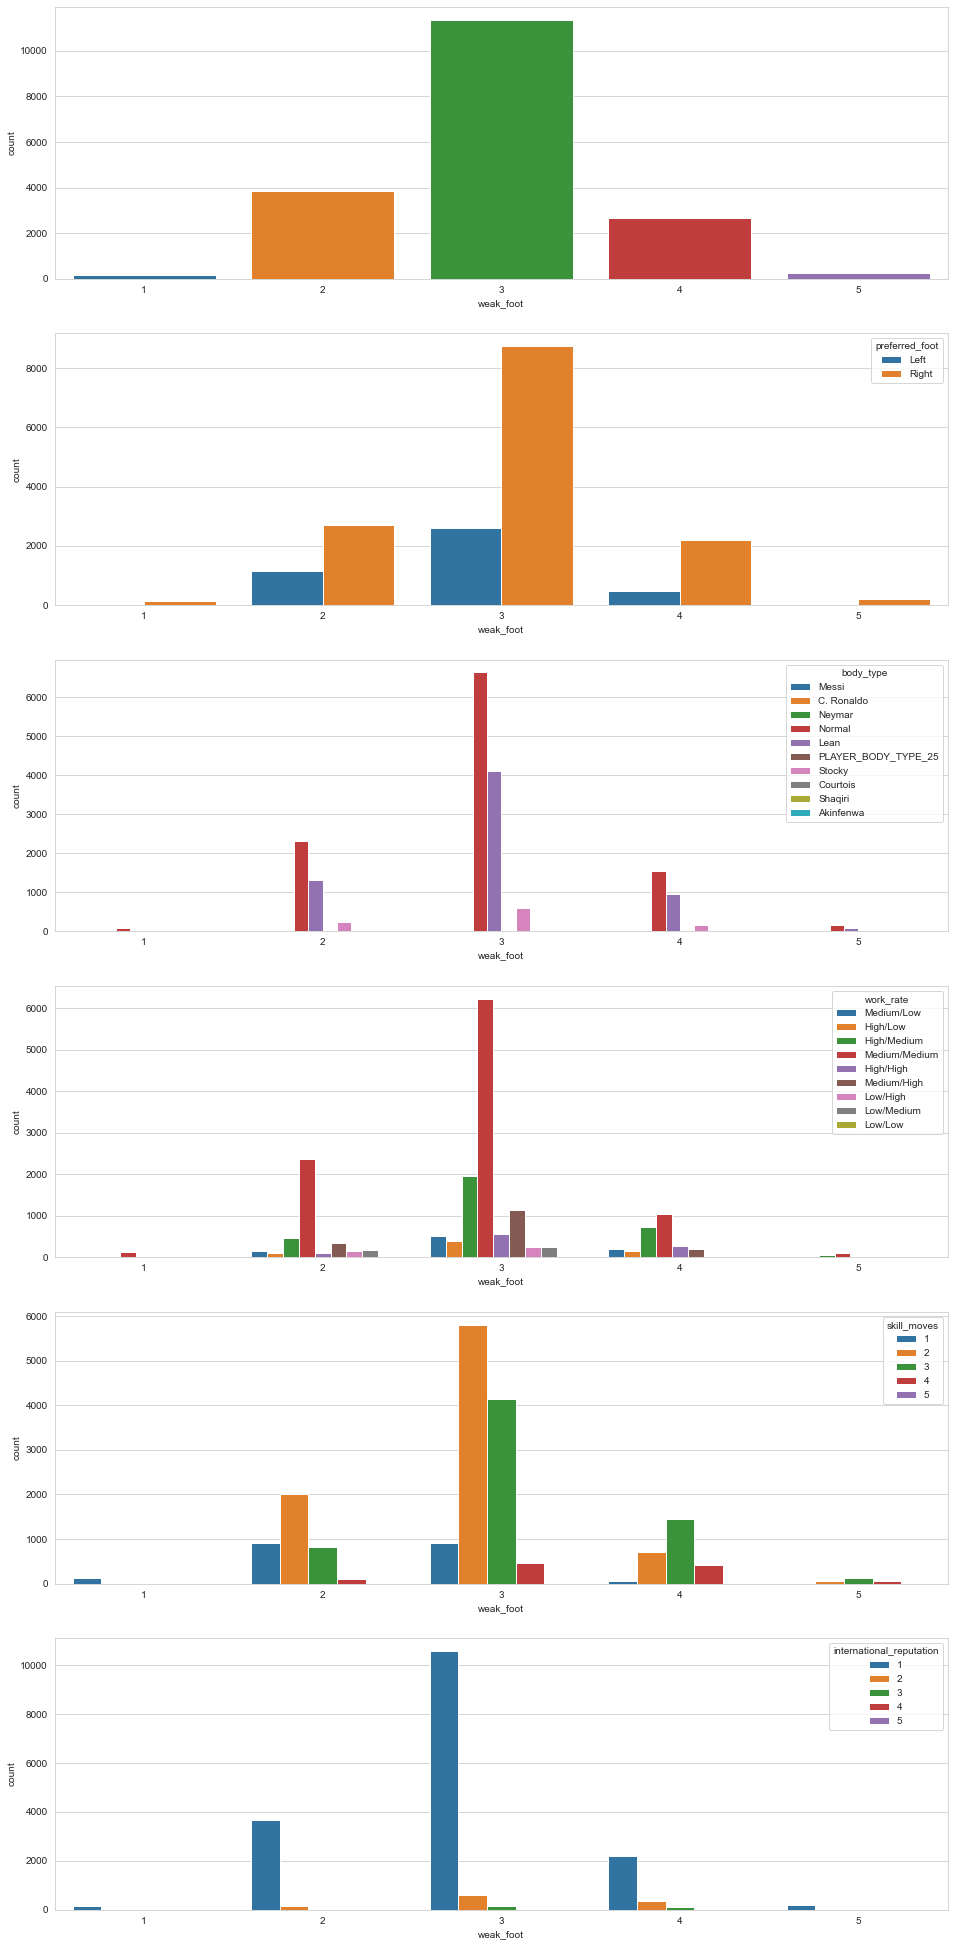

In [49]:
plt.figure(figsize=(16,35))
ax=plt.subplot(6,1,1)
sns.set_style(style="whitegrid")
sns.countplot(df.weak_foot)
ax=plt.subplot(6,1,2)
sns.set_style(style="whitegrid")
sns.countplot(df.weak_foot,hue=df.preferred_foot)
ax=plt.subplot(6,1,3)
sns.set_style(style="whitegrid")
sns.countplot(df.weak_foot,hue=df.body_type)
ax=plt.subplot(6,1,4)
sns.set_style(style="whitegrid")
sns.countplot(df.weak_foot,hue=df.work_rate)
ax=plt.subplot(6,1,5)
sns.set_style(style="whitegrid")
sns.countplot(df.weak_foot,hue=df.skill_moves)
ax=plt.subplot(6,1,6)
sns.set_style(style="whitegrid")
sns.countplot(df.weak_foot,hue=df.international_reputation)

<AxesSubplot:xlabel='age', ylabel='weight_kg'>

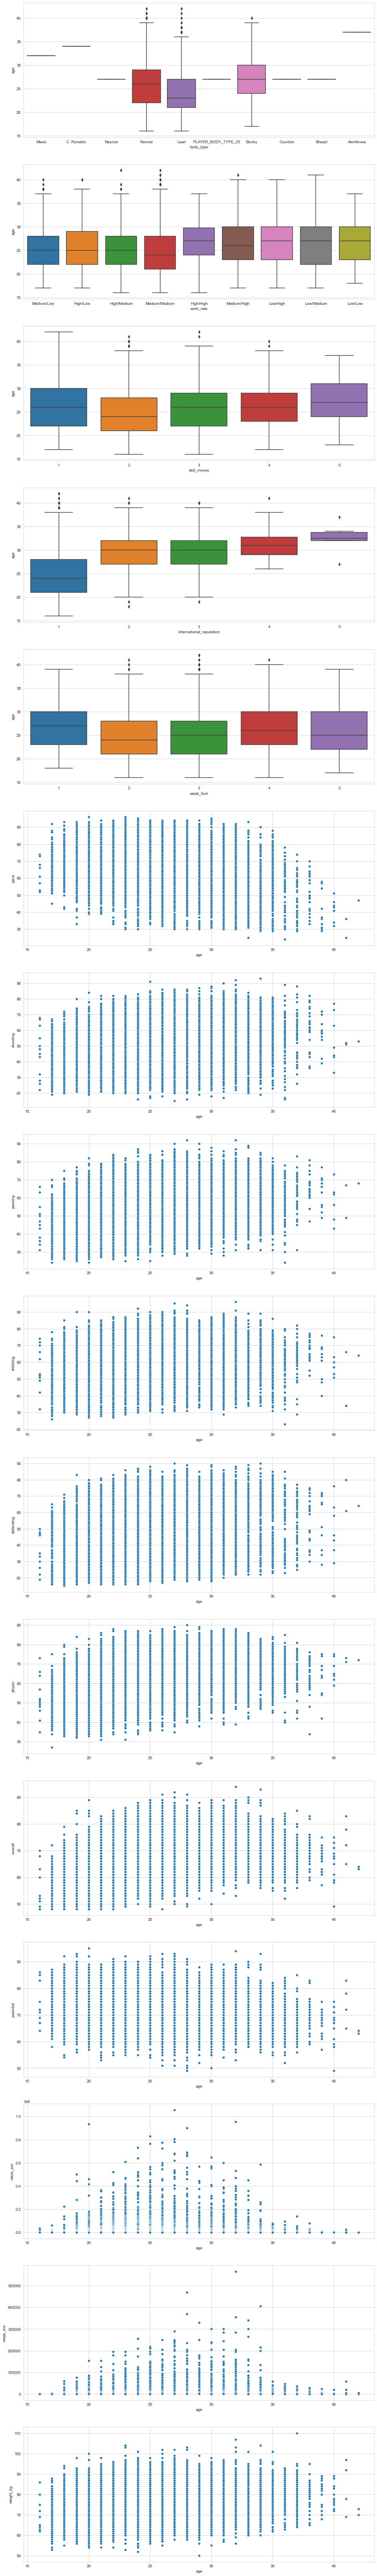

In [8]:
plt.figure(figsize=(16,120))
ax=plt.subplot(16,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.age)
ax=plt.subplot(16,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.age)
ax=plt.subplot(16,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.age)
ax=plt.subplot(16,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.age)
ax=plt.subplot(16,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.age)
ax=plt.subplot(16,1,6)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.pace)
ax=plt.subplot(16,1,7)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.shooting)
ax=plt.subplot(16,1,8)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.passing)
ax=plt.subplot(16,1,9)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.dribbling)
ax=plt.subplot(16,1,10)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.defending)
ax=plt.subplot(16,1,11)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.physic)
ax=plt.subplot(16,1,12)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.overall)
ax=plt.subplot(16,1,13)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.potential)
ax=plt.subplot(16,1,14)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.value_eur)
ax=plt.subplot(16,1,15)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.wage_eur)
ax=plt.subplot(16,1,16)
sns.set_style(style="whitegrid")
sns.scatterplot(df.age,df.weight_kg)


<AxesSubplot:xlabel='weight_kg', ylabel='wage_eur'>

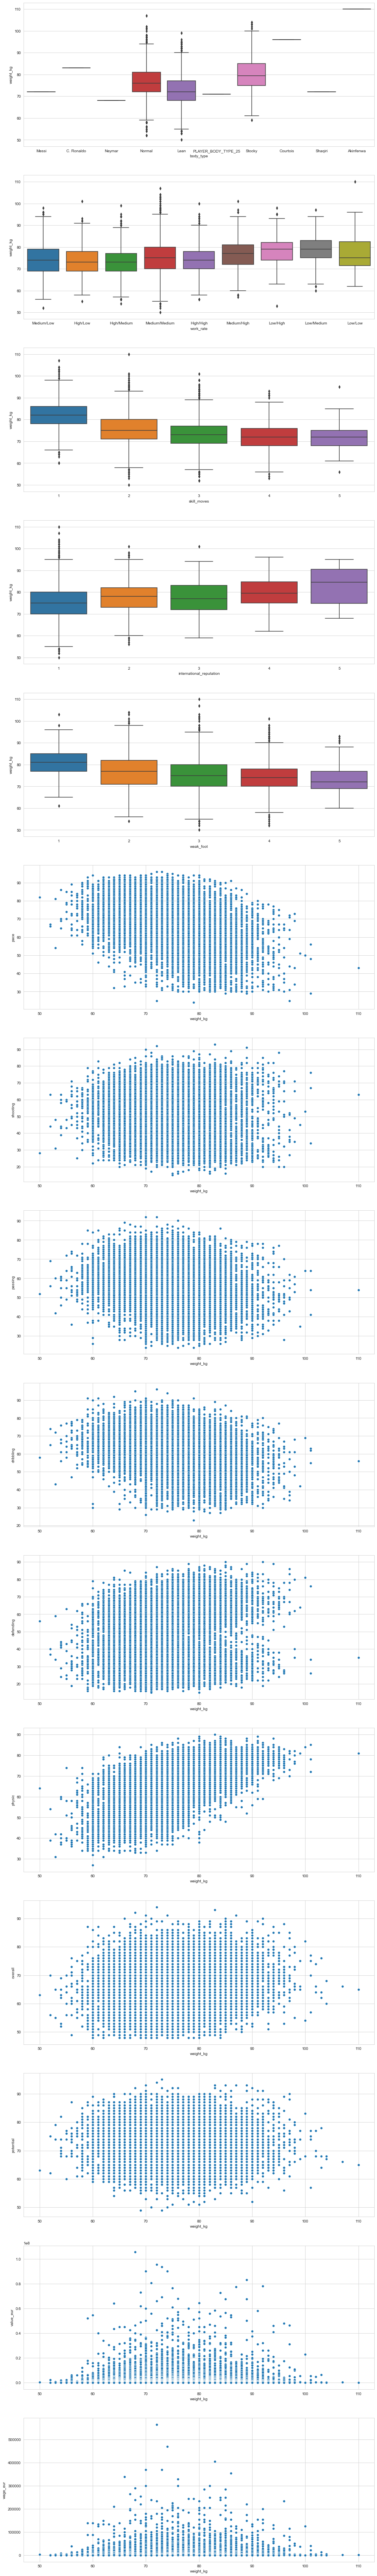

In [9]:
plt.figure(figsize=(16,120))

ax=plt.subplot(15,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.weight_kg)
ax=plt.subplot(15,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.weight_kg)
ax=plt.subplot(15,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.weight_kg)
ax=plt.subplot(15,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.weight_kg)
ax=plt.subplot(15,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.weight_kg)
ax=plt.subplot(15,1,6)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.pace)
ax=plt.subplot(15,1,7)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.shooting)
ax=plt.subplot(15,1,8)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.passing)
ax=plt.subplot(15,1,9)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.dribbling,)
ax=plt.subplot(15,1,10)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.defending)
ax=plt.subplot(15,1,11)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.physic)
ax=plt.subplot(15,1,12)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.overall)
ax=plt.subplot(15,1,13)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.potential)
ax=plt.subplot(15,1,14)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.value_eur)
ax=plt.subplot(15,1,15)
sns.set_style(style="whitegrid")
sns.scatterplot(df.weight_kg,df.wage_eur)



<AxesSubplot:xlabel='wage_eur', ylabel='overall'>

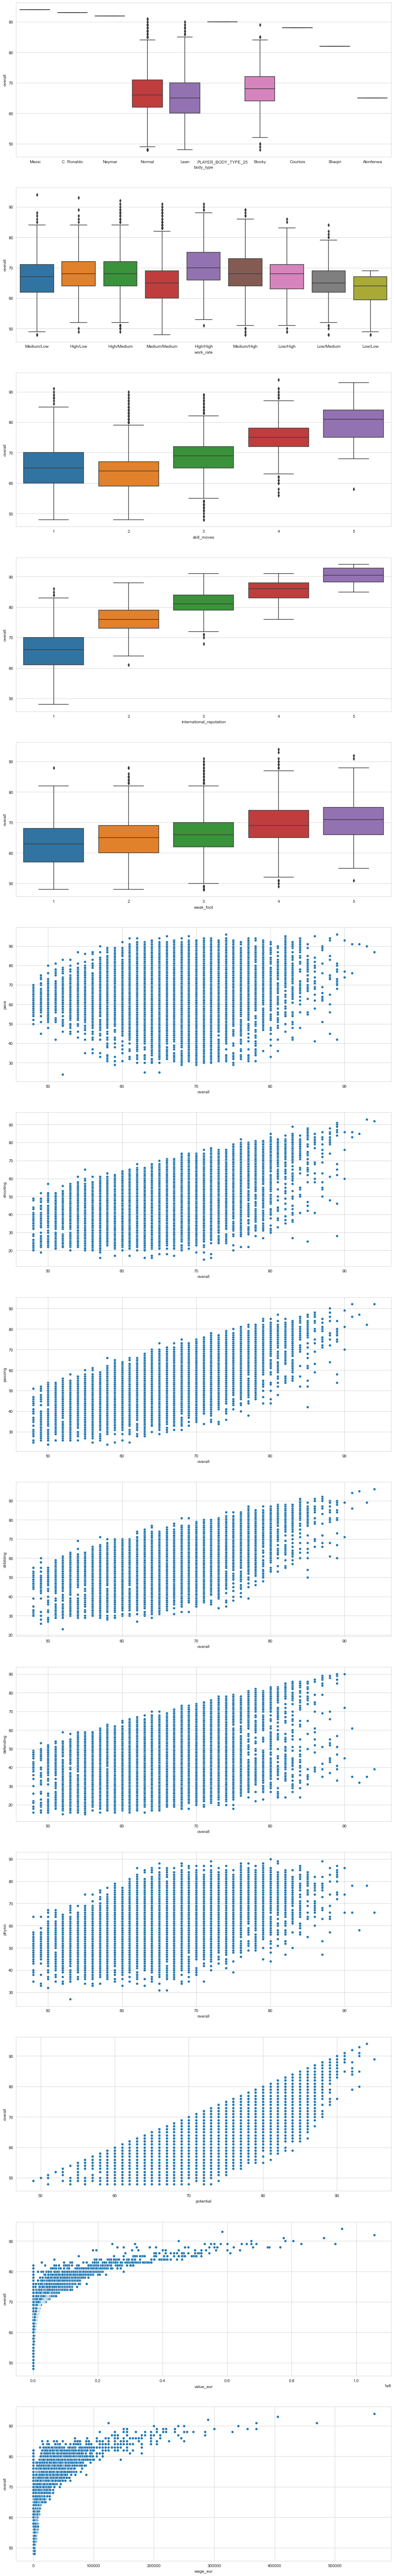

In [11]:
plt.figure(figsize=(16,120))
ax=plt.subplot(15,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.overall)
ax=plt.subplot(15,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.overall)
ax=plt.subplot(15,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.overall)
ax=plt.subplot(15,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.overall)
ax=plt.subplot(15,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.overall)
ax=plt.subplot(15,1,6)
sns.set_style(style="whitegrid")
sns.scatterplot(df.overall,df.pace)
ax=plt.subplot(15,1,7)
sns.set_style(style="whitegrid")
sns.scatterplot(df.overall,df.shooting)
ax=plt.subplot(15,1,8)
sns.set_style(style="whitegrid")
sns.scatterplot(df.overall,df.passing)
ax=plt.subplot(15,1,9)
sns.set_style(style="whitegrid")
sns.scatterplot(df.overall,df.dribbling)
ax=plt.subplot(15,1,10)
sns.set_style(style="whitegrid")
sns.scatterplot(df.overall,df.defending)
ax=plt.subplot(15,1,11)
sns.set_style(style="whitegrid")
sns.scatterplot(df.overall,df.physic)
ax=plt.subplot(15,1,12)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.overall)
ax=plt.subplot(15,1,13)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.overall)
ax=plt.subplot(15,1,14)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.overall)


<AxesSubplot:xlabel='potential', ylabel='wage_eur'>

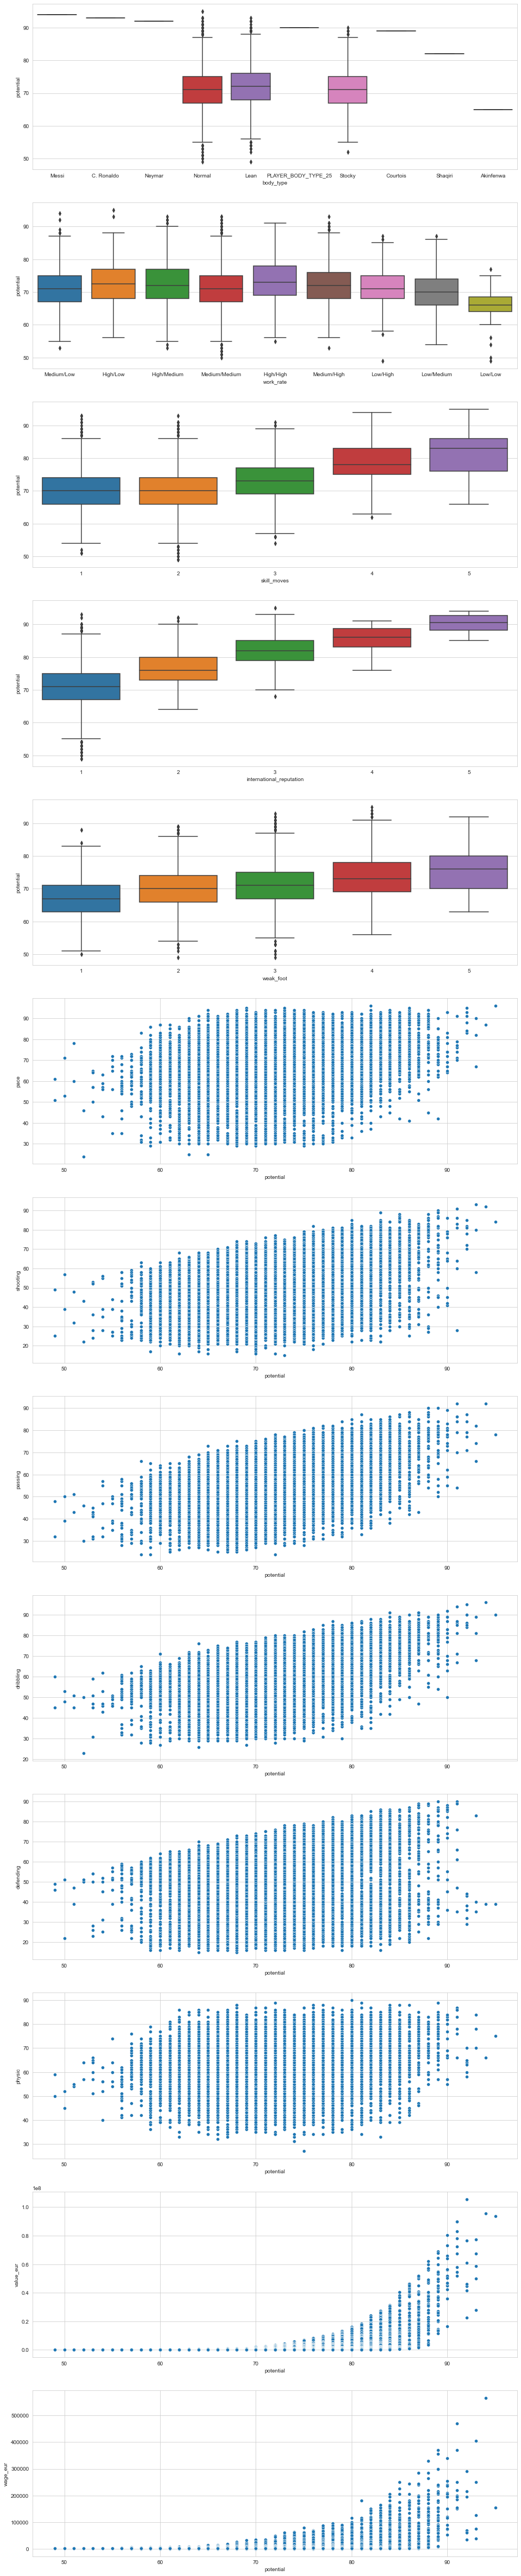

In [13]:
plt.figure(figsize=(16,100))
ax=plt.subplot(15,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.potential)
ax=plt.subplot(15,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.potential)
ax=plt.subplot(15,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.potential)
ax=plt.subplot(15,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.potential)
ax=plt.subplot(15,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.potential)
ax=plt.subplot(15,1,6)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.pace)
ax=plt.subplot(15,1,7)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.shooting)
ax=plt.subplot(15,1,8)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.passing)
ax=plt.subplot(15,1,9)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.dribbling)
ax=plt.subplot(15,1,10)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.defending)
ax=plt.subplot(15,1,11)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.physic)
ax=plt.subplot(15,1,12)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.value_eur)
ax=plt.subplot(15,1,13)
sns.set_style(style="whitegrid")
sns.scatterplot(df.potential,df.wage_eur)


<AxesSubplot:xlabel='value_eur', ylabel='wage_eur'>

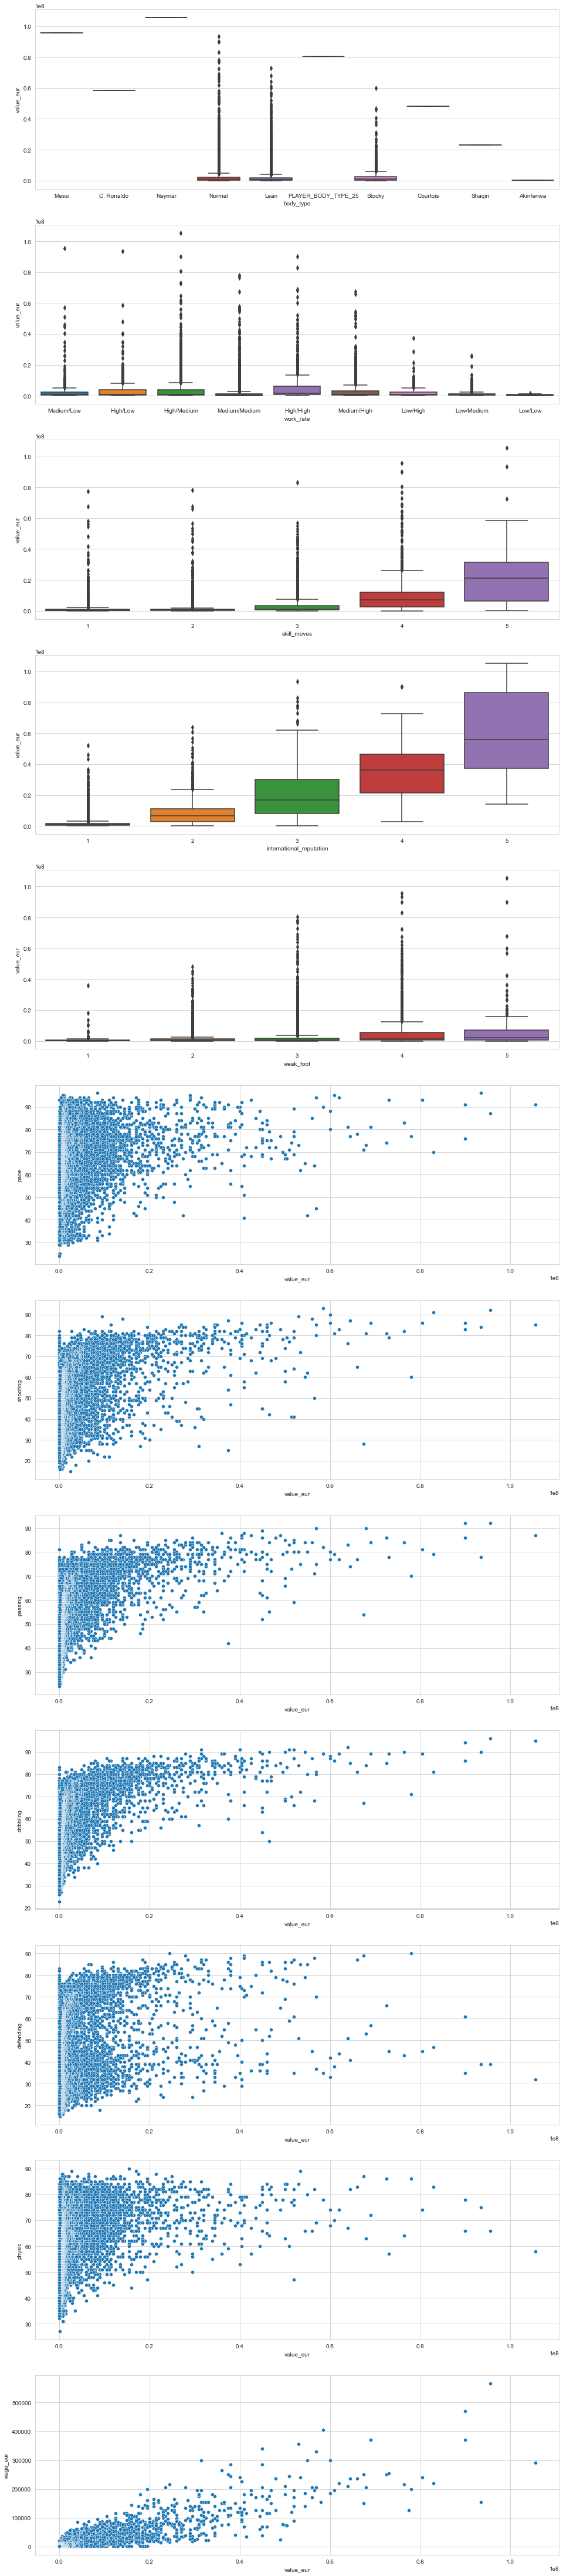

In [14]:
plt.figure(figsize=(16,100))

ax=plt.subplot(15,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.value_eur)
ax=plt.subplot(15,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.value_eur)
ax=plt.subplot(15,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.value_eur)
ax=plt.subplot(15,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.value_eur)
ax=plt.subplot(15,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.value_eur)
ax=plt.subplot(15,1,6)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.pace)
ax=plt.subplot(15,1,7)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.shooting)
ax=plt.subplot(15,1,8)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.passing)
ax=plt.subplot(15,1,9)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.dribbling)
ax=plt.subplot(15,1,10)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.defending)
ax=plt.subplot(15,1,11)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.physic)
ax=plt.subplot(15,1,12)
sns.set_style(style="whitegrid")
sns.scatterplot(df.value_eur,df.wage_eur)

<AxesSubplot:xlabel='wage_eur', ylabel='physic'>

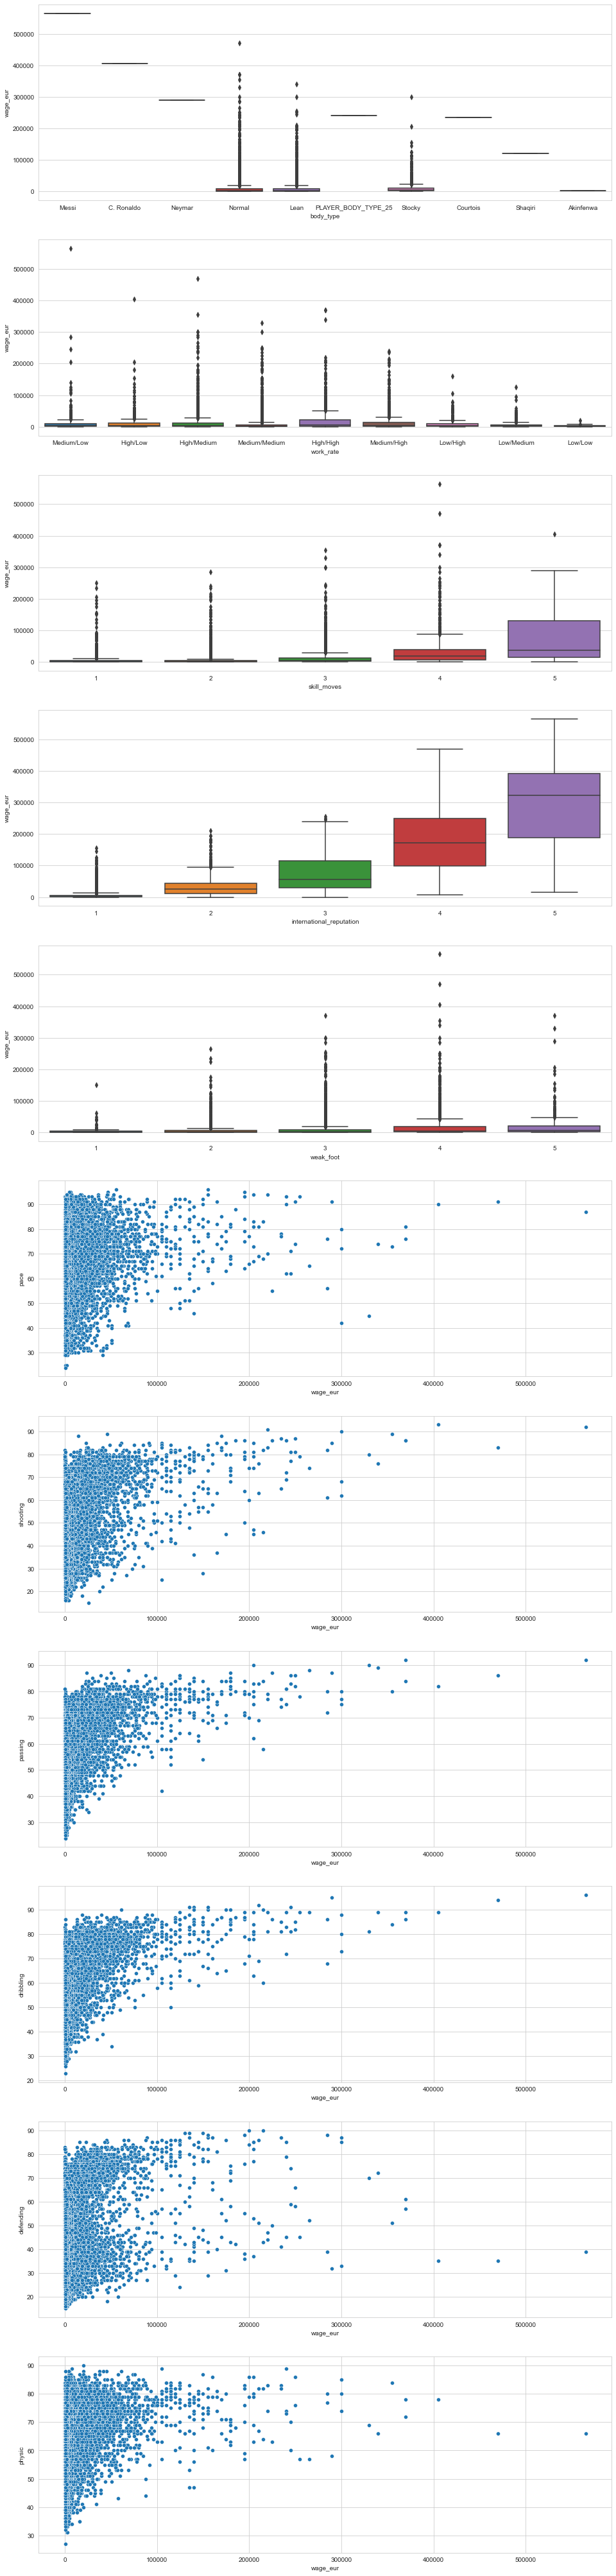

In [15]:
plt.figure(figsize=(16,100))

ax=plt.subplot(15,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.wage_eur)
ax=plt.subplot(15,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.wage_eur)
ax=plt.subplot(15,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.wage_eur)
ax=plt.subplot(15,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.wage_eur)
ax=plt.subplot(15,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.wage_eur)
ax=plt.subplot(15,1,6)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.pace)
ax=plt.subplot(15,1,7)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.shooting)
ax=plt.subplot(15,1,8)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.passing)
ax=plt.subplot(15,1,9)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.dribbling)
ax=plt.subplot(15,1,10)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.defending)
ax=plt.subplot(15,1,11)
sns.set_style(style="whitegrid")
sns.scatterplot(df.wage_eur,df.physic)

<AxesSubplot:xlabel='weak_foot', ylabel='pace'>

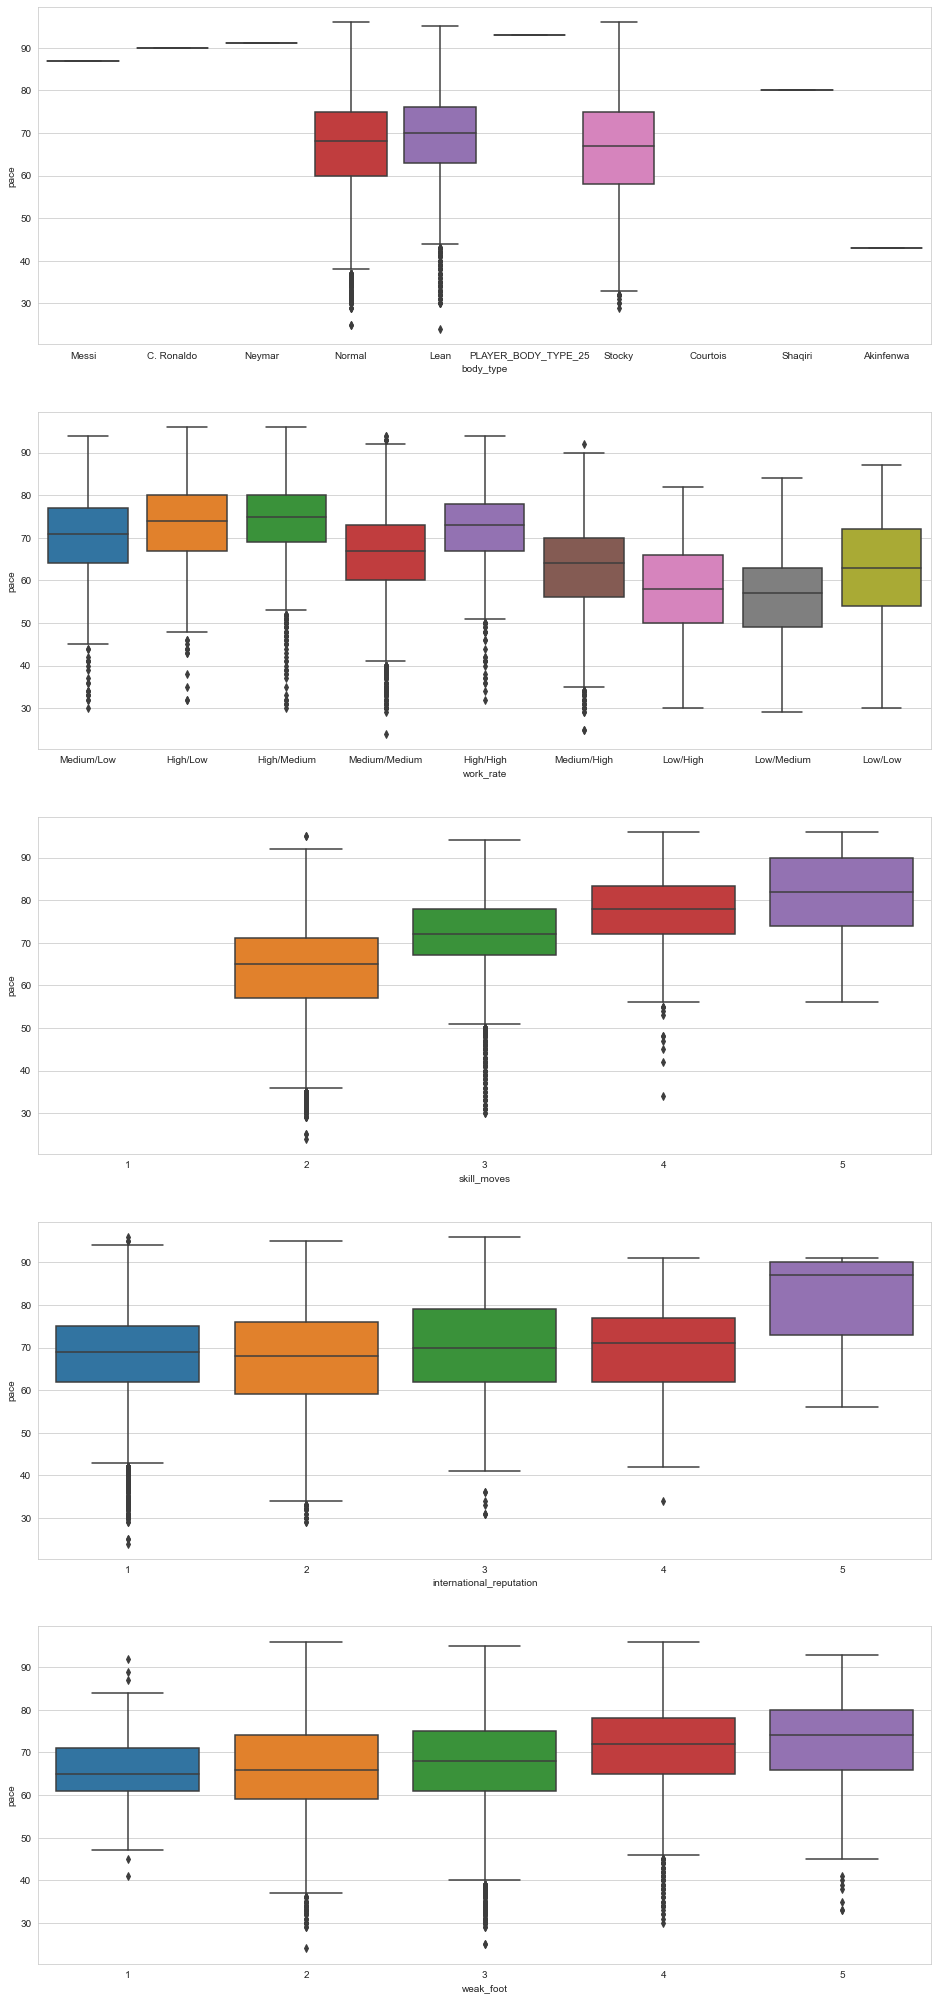

In [17]:
plt.figure(figsize=(16,36))

ax=plt.subplot(5,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.pace)
ax=plt.subplot(5,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.pace)
ax=plt.subplot(5,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.pace)
ax=plt.subplot(5,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.pace)
ax=plt.subplot(5,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.pace)


<AxesSubplot:xlabel='weak_foot', ylabel='shooting'>

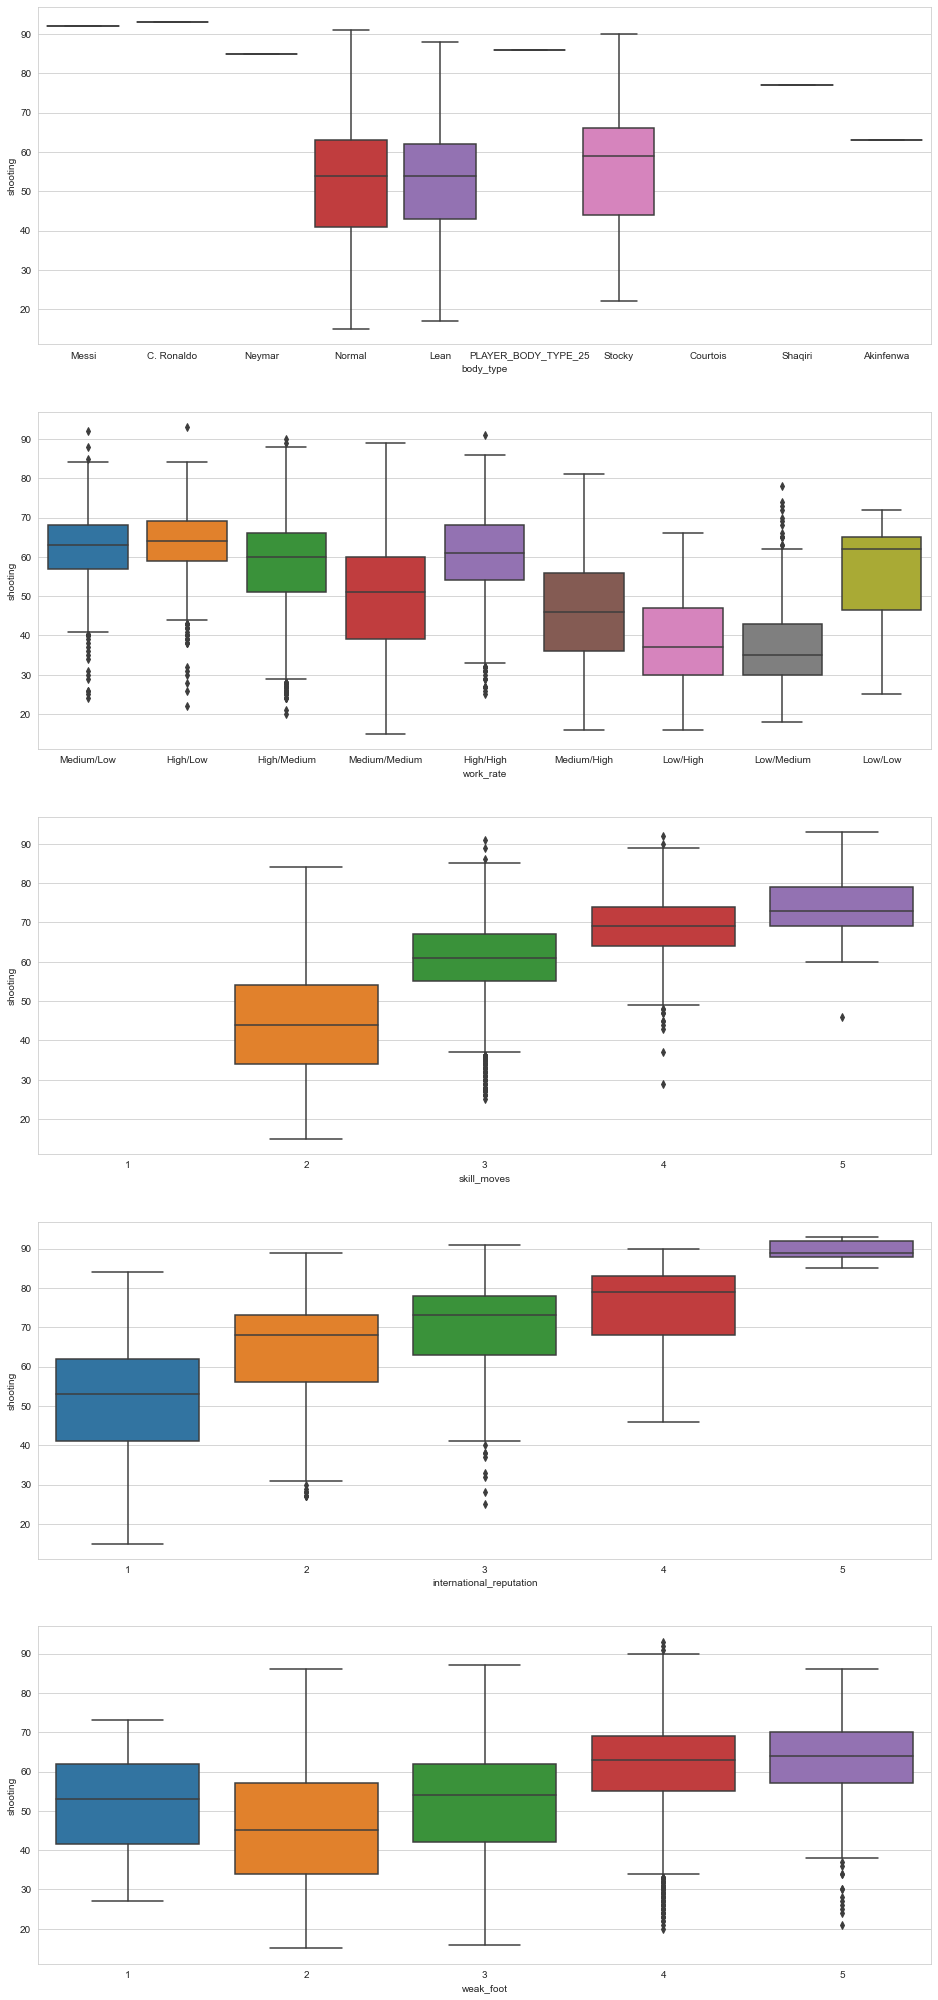

In [18]:
plt.figure(figsize=(16,36))

ax=plt.subplot(5,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.shooting)
ax=plt.subplot(5,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.shooting)
ax=plt.subplot(5,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.shooting)
ax=plt.subplot(5,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.shooting)
ax=plt.subplot(5,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.shooting)


<AxesSubplot:xlabel='weak_foot', ylabel='passing'>

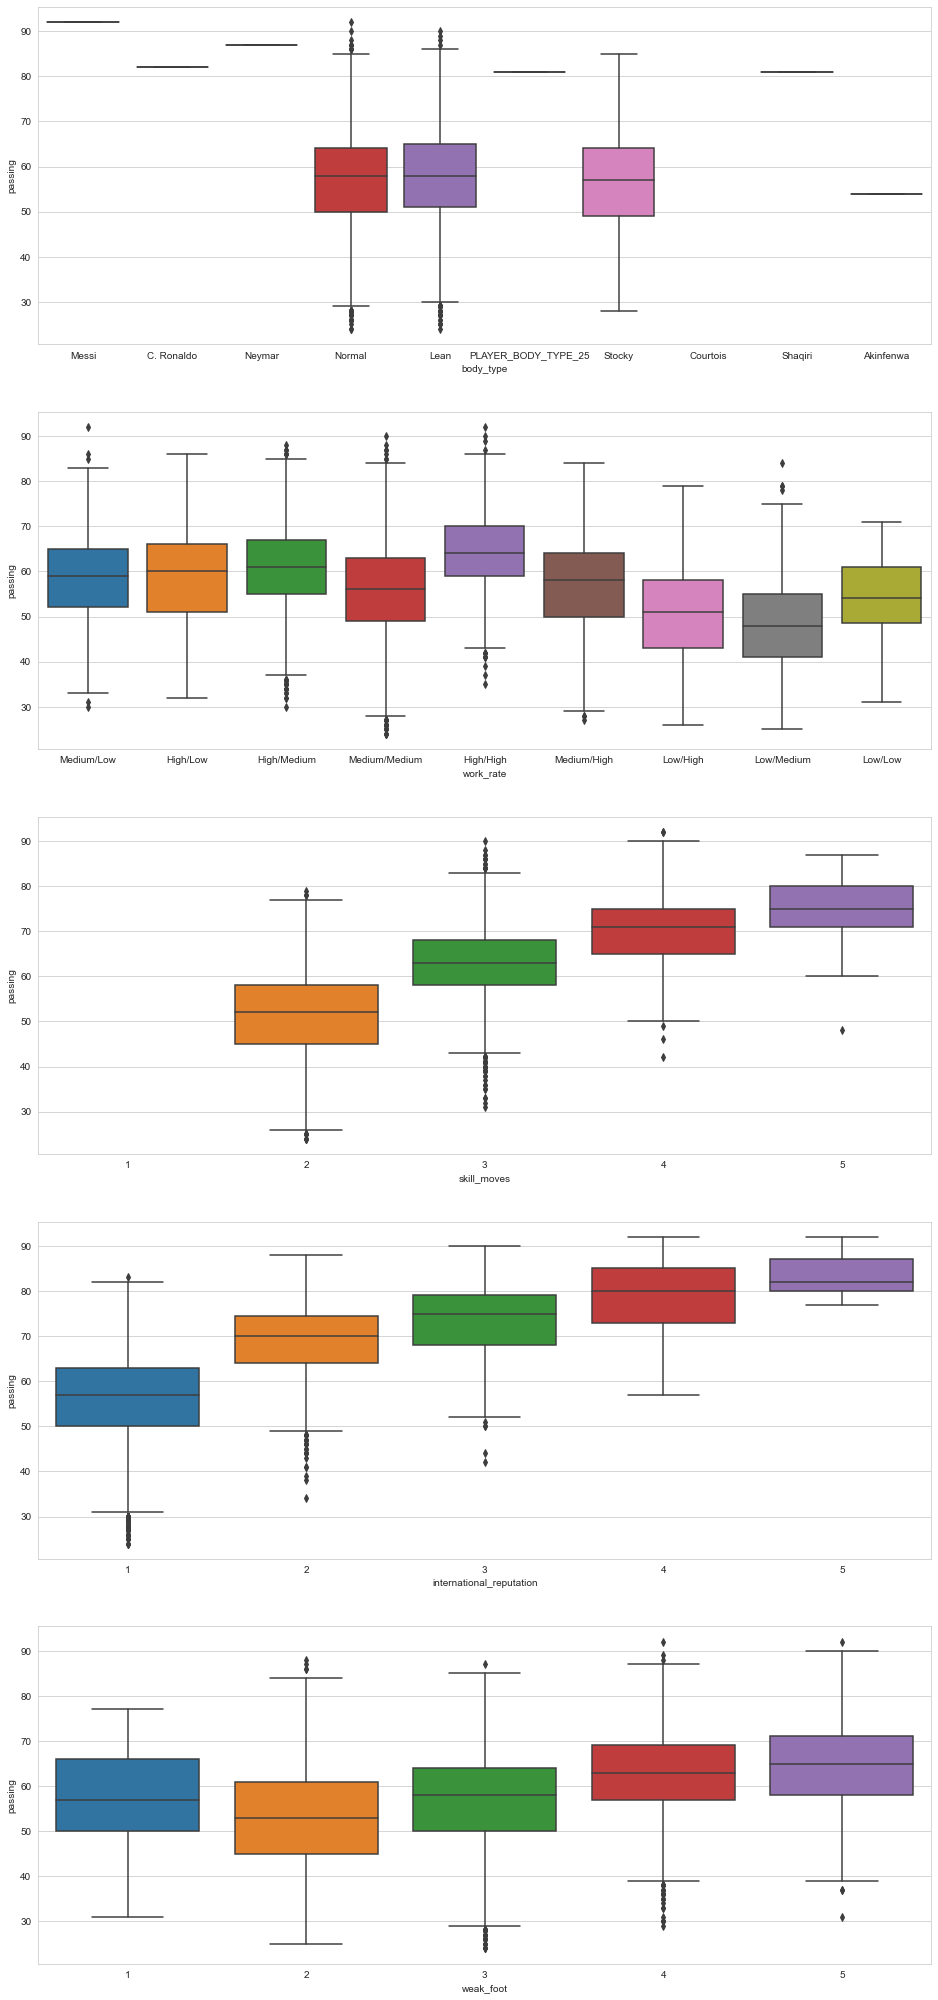

In [19]:
plt.figure(figsize=(16,36))

ax=plt.subplot(5,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.passing)
ax=plt.subplot(5,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.passing)
ax=plt.subplot(5,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.passing)
ax=plt.subplot(5,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.passing)
ax=plt.subplot(5,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.passing)

<AxesSubplot:xlabel='weak_foot', ylabel='dribbling'>

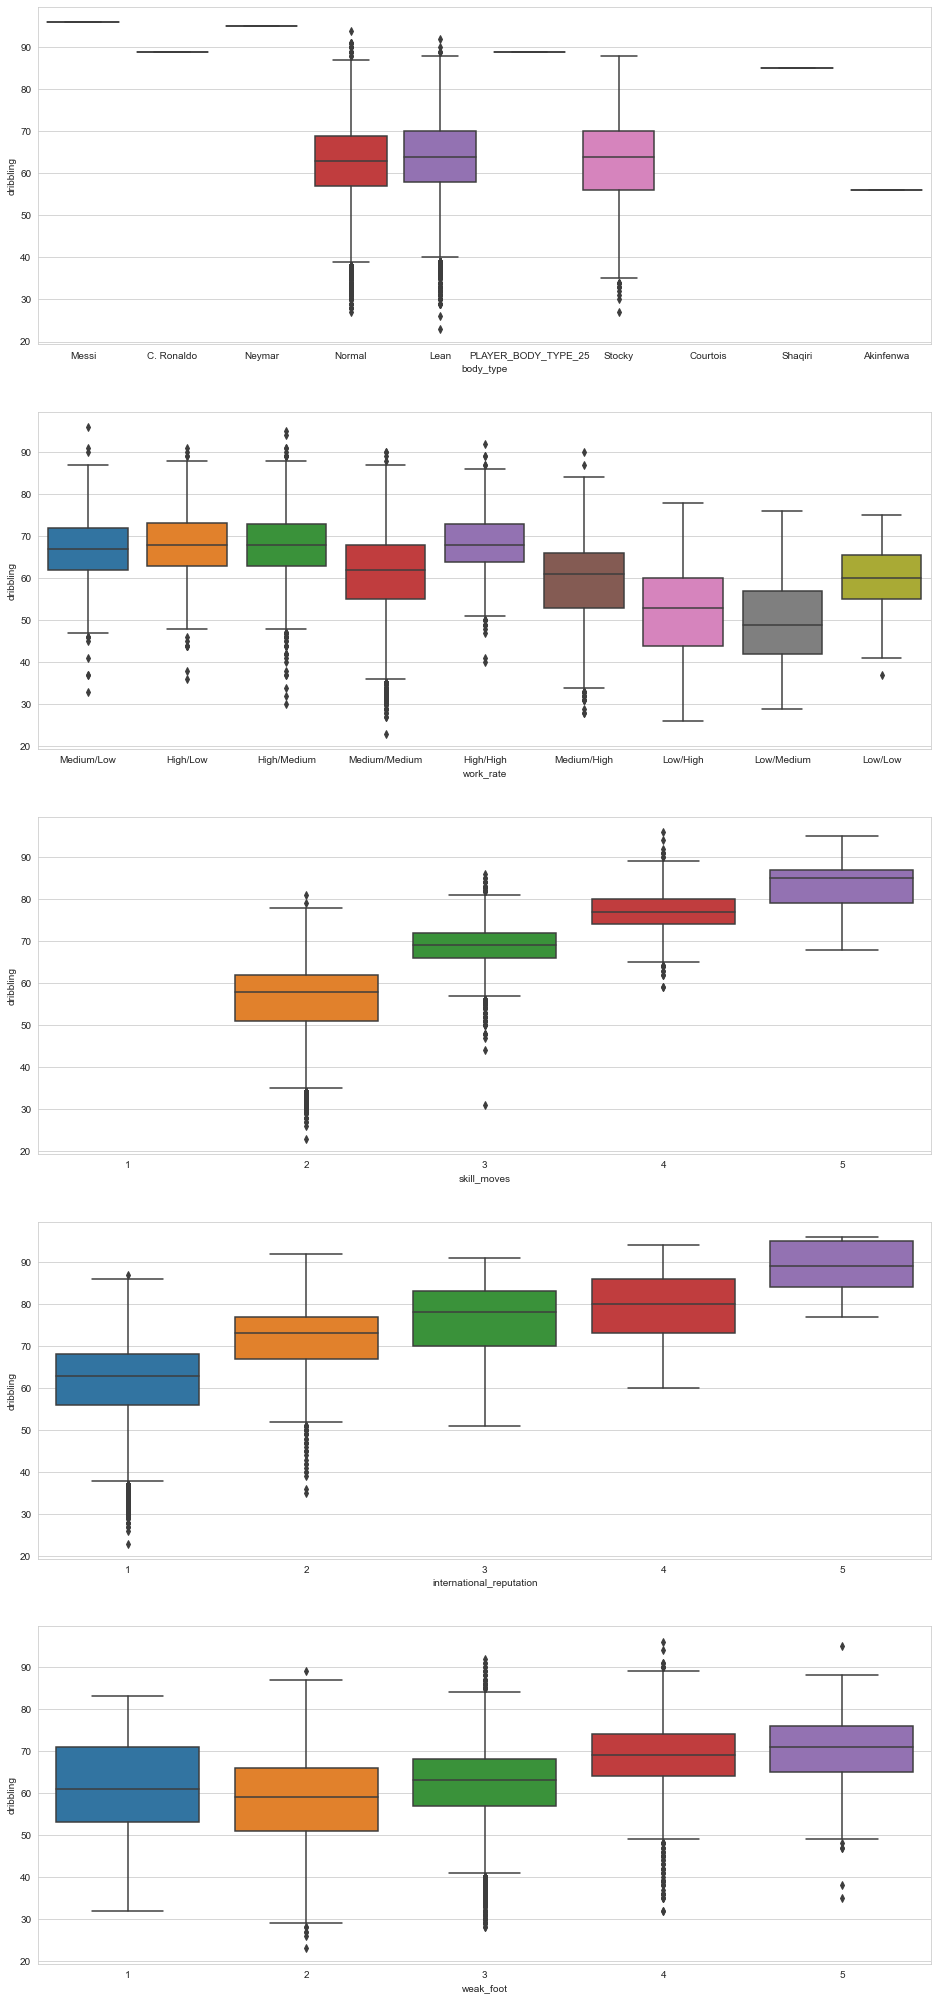

In [20]:
plt.figure(figsize=(16,36))

ax=plt.subplot(5,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.dribbling)
ax=plt.subplot(5,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.dribbling)
ax=plt.subplot(5,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.dribbling)
ax=plt.subplot(5,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.dribbling)
ax=plt.subplot(5,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.dribbling)

<AxesSubplot:xlabel='weak_foot', ylabel='defending'>

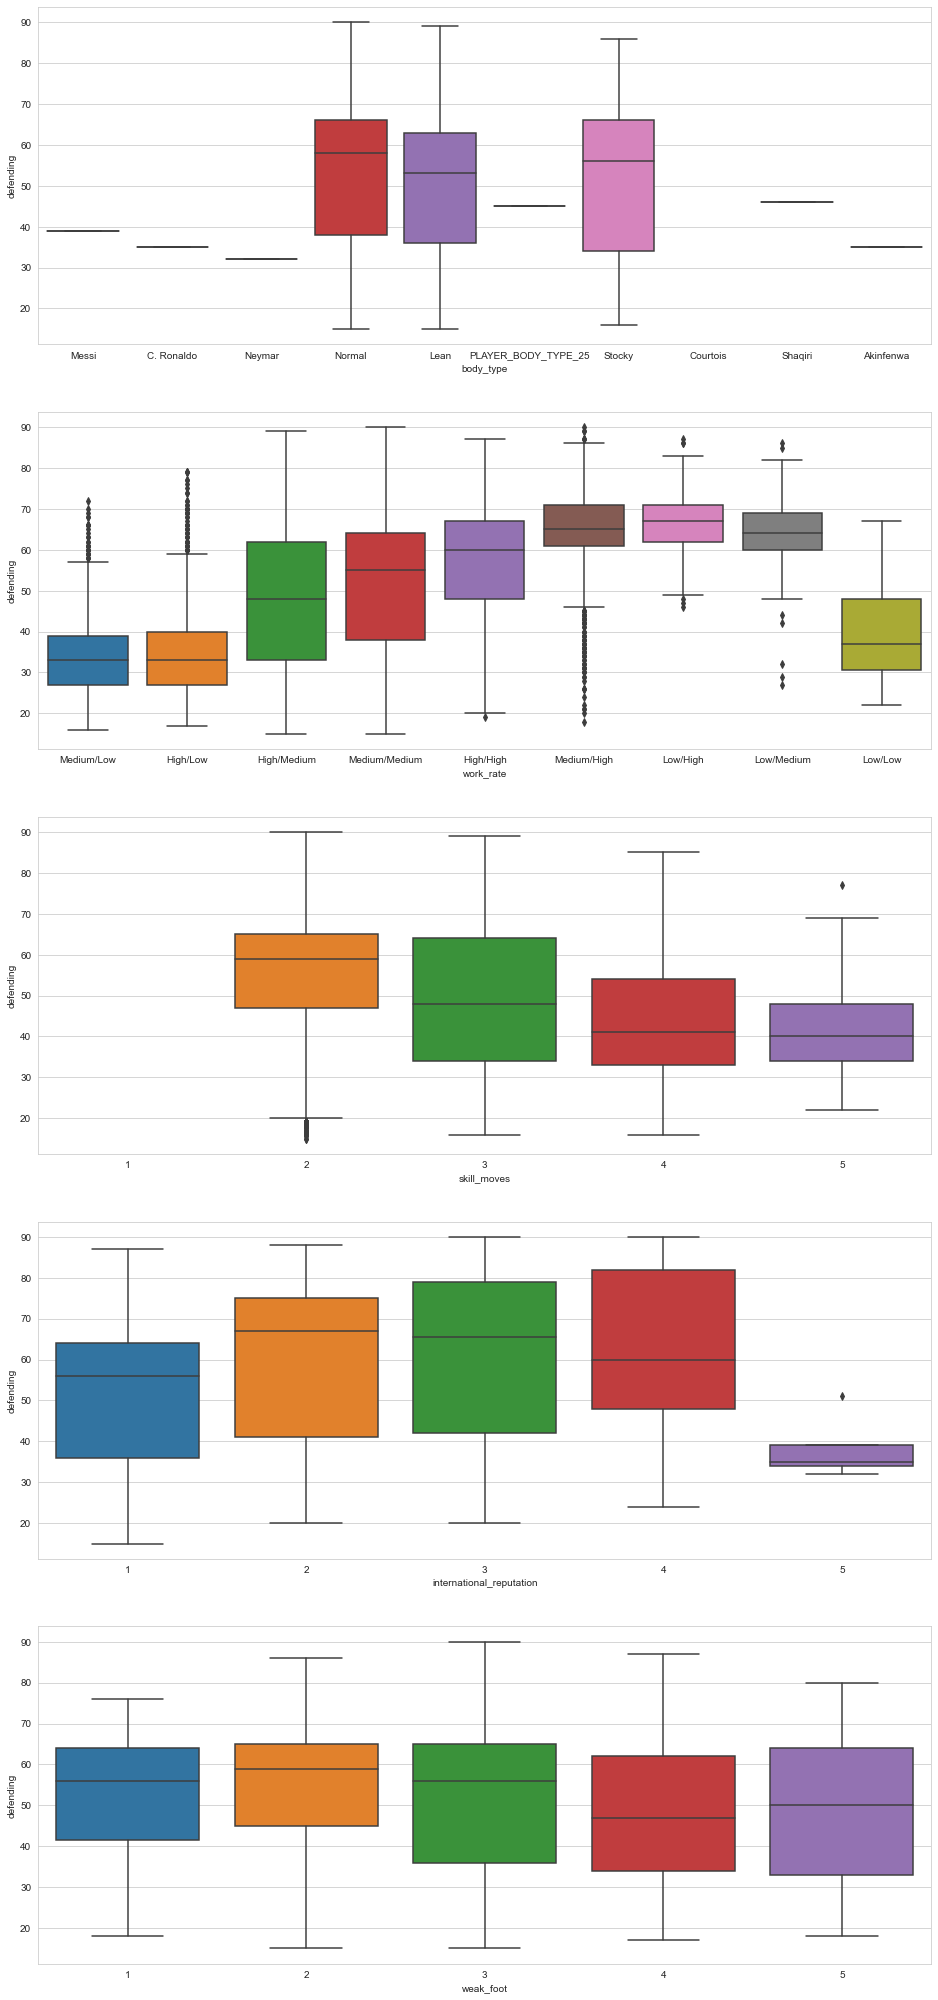

In [21]:
plt.figure(figsize=(16,36))

ax=plt.subplot(5,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.defending)
ax=plt.subplot(5,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.defending)
ax=plt.subplot(5,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.defending)
ax=plt.subplot(5,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.defending)
ax=plt.subplot(5,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.defending)

<AxesSubplot:xlabel='weak_foot', ylabel='physic'>

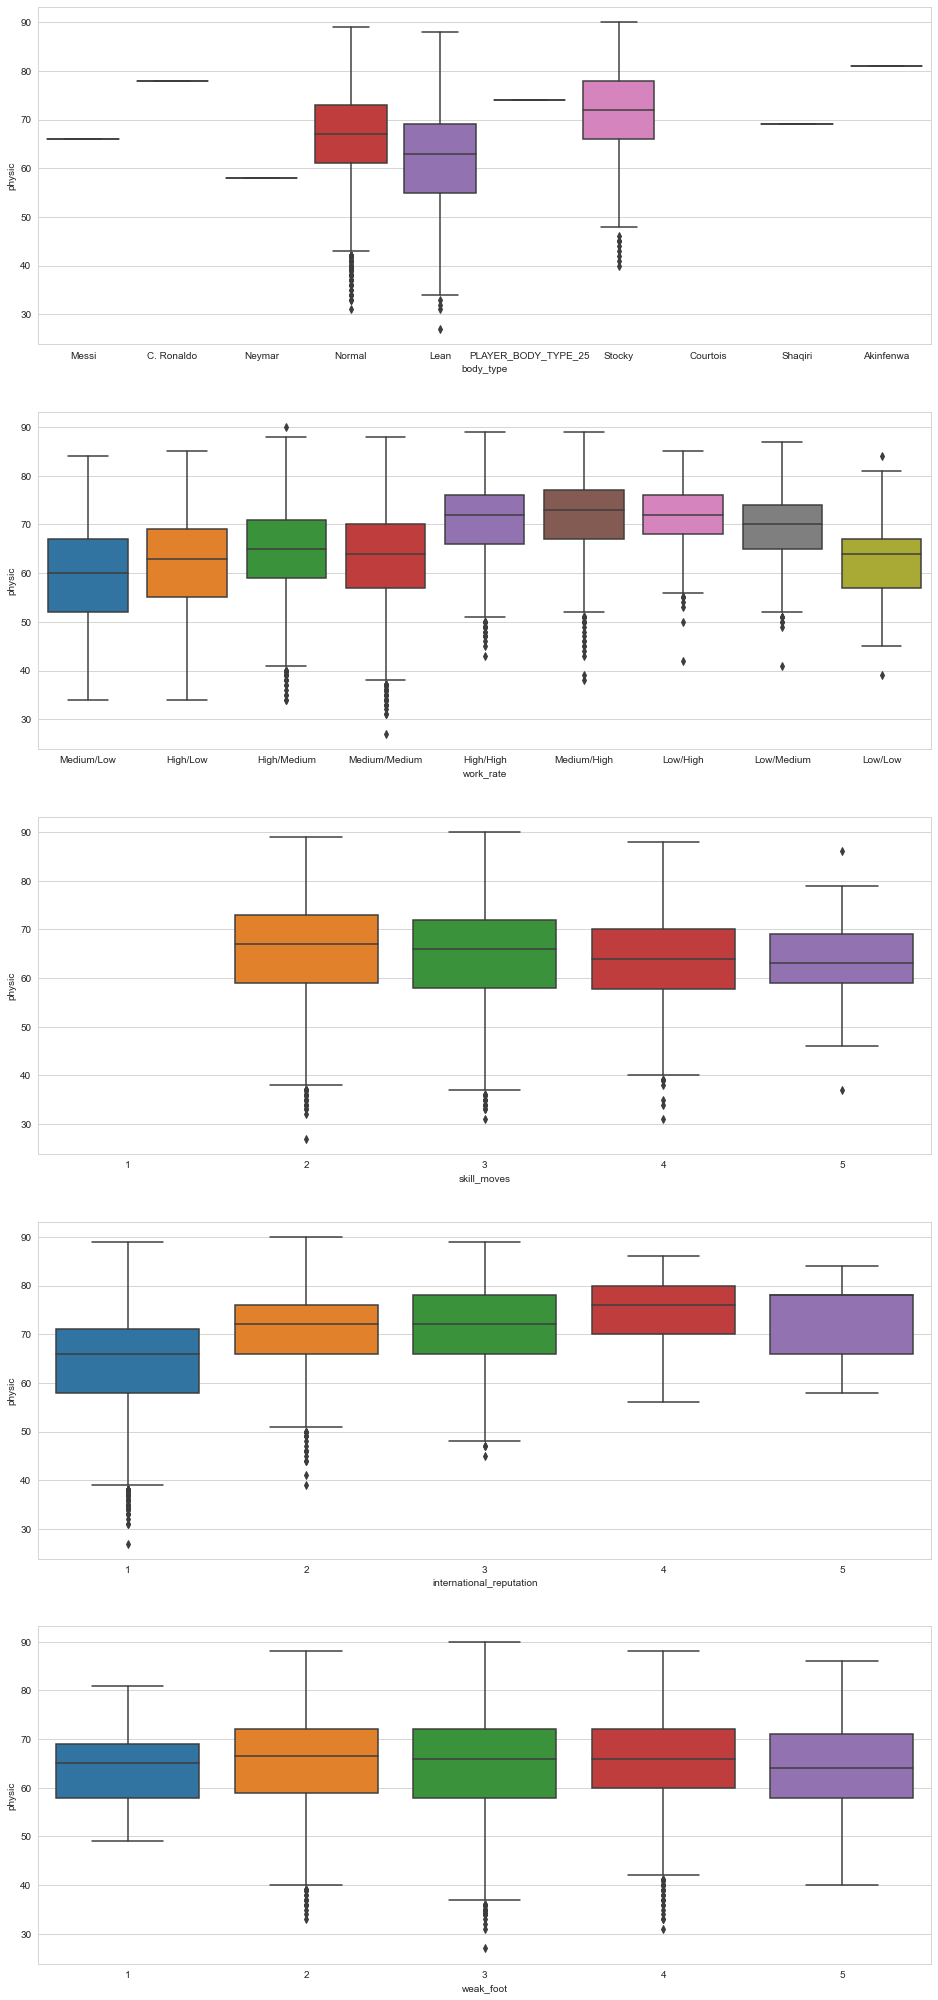

In [22]:
plt.figure(figsize=(16,36))

ax=plt.subplot(5,1,1)
sns.set_style(style="whitegrid")
sns.boxplot(df.body_type,df.physic)
ax=plt.subplot(5,1,2)
sns.set_style(style="whitegrid")
sns.boxplot(df.work_rate,df.physic)
ax=plt.subplot(5,1,3)
sns.set_style(style="whitegrid")
sns.boxplot(df.skill_moves,df.physic)
ax=plt.subplot(5,1,4)
sns.set_style(style="whitegrid")
sns.boxplot(df.international_reputation,df.physic)
ax=plt.subplot(5,1,5)
sns.set_style(style="whitegrid")
sns.boxplot(df.weak_foot,df.physic)